In [55]:
import warnings
import pandas as pd
import numpy as np
    
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Fast compile option: if the GOGREEN class has already been compiled and there has 
# been no change made to the catalog, uncomment the second line before running
priorCatalog = pd.DataFrame()
priorCatalog = gg.catalog

with warnings.catch_warnings(): #suppressing depracation warnings for the import and instantion process for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)

    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN_WITH_FLAGS.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/', priorCatalog=priorCatalog)
    
    #print(gg.catalog.columns.to_list())

In [4]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag == 0',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [9]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 89
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 2
starForming and postStarBurst: 1
passive: 161
passive and greenValley: 0
passive and blueQuiescent: 15
passive and postStarBurst: 14
greenValley: 38
greenValley and blueQuiescent: 4
greenValley and postStarBurst: 1
blueQuiescent: 21
blueQuiescent and postStarBurst: 7
postStarBurst: 16


In [10]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [11]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 128
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 5
starForming and postStarBurst: 1
passive: 239
passive and greenValley: 0
passive and blueQuiescent: 24
passive and postStarBurst: 15
greenValley: 53
greenValley and blueQuiescent: 8
greenValley and postStarBurst: 1
blueQuiescent: 37
blueQuiescent and postStarBurst: 7
postStarBurst: 17


In [12]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag == 0',
            'Mstellar > 10**9.5',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [13]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 131
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 5
starForming and postStarBurst: 1
passive: 185
passive and greenValley: 0
passive and blueQuiescent: 24
passive and postStarBurst: 14
greenValley: 43
greenValley and blueQuiescent: 7
greenValley and postStarBurst: 2
blueQuiescent: 36
blueQuiescent and postStarBurst: 8
postStarBurst: 17


In [56]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.5',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [15]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 185
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 8
starForming and postStarBurst: 1
passive: 268
passive and greenValley: 0
passive and blueQuiescent: 34
passive and postStarBurst: 15
greenValley: 60
greenValley and blueQuiescent: 11
greenValley and postStarBurst: 2
blueQuiescent: 53
blueQuiescent and postStarBurst: 8
postStarBurst: 18


In [40]:
gg.setGoodData(["nonmember_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 169
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 10
starForming and postStarBurst: 1
passive: 72
passive and greenValley: 0
passive and blueQuiescent: 14
passive and postStarBurst: 6
greenValley: 30
greenValley and blueQuiescent: 5
greenValley and postStarBurst: 0
blueQuiescent: 29
blueQuiescent and postStarBurst: 3
postStarBurst: 7


count
(268,)
count
(185,)
count
(60,)
268 185 268 185


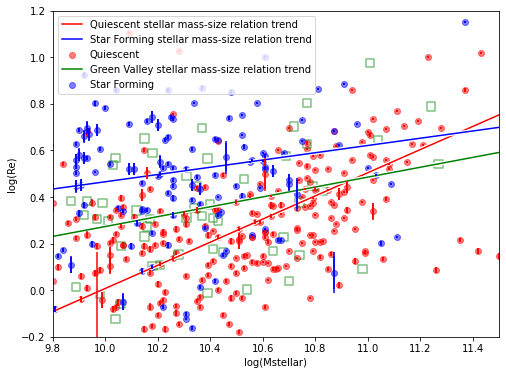

In [32]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='GV')

count
(268,)
count
(185,)
count
(53,)
268 185 268 185


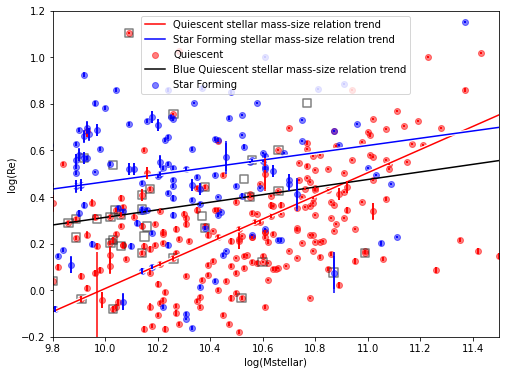

In [37]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='BQ')

count
(268,)
count
(185,)
count
(18,)
268 185 268 185


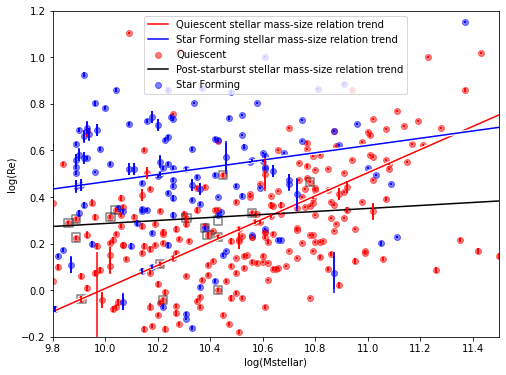

In [38]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='PSB')

['nonmember_adjusted == 1']
count
(72,)
count
(169,)
72 169 72 169


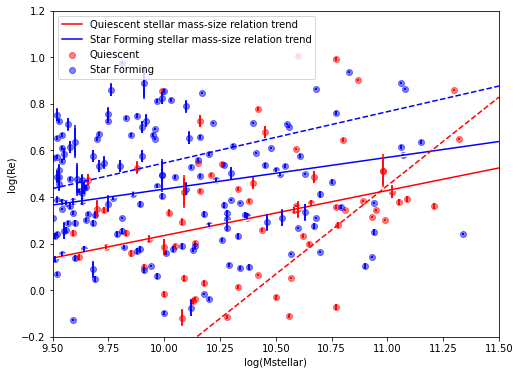

In [58]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='not', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.5,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True)

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
49 0 49 0


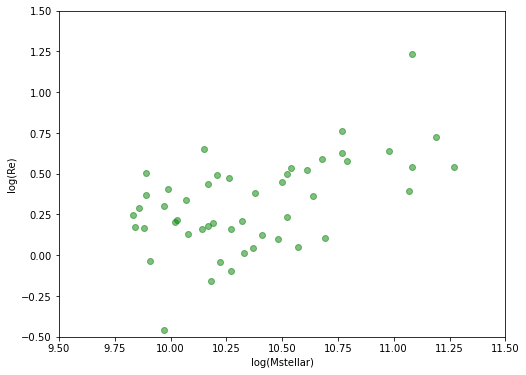

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
49 0 49 0


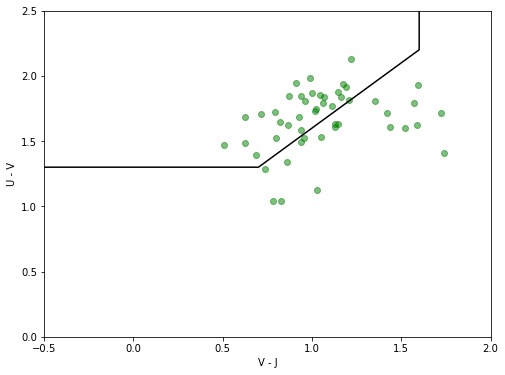

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
32 17 32 17


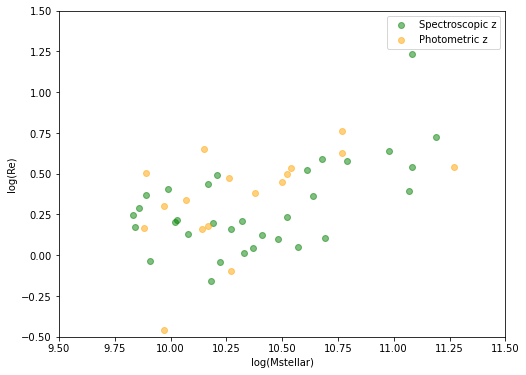

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
32 17 32 17


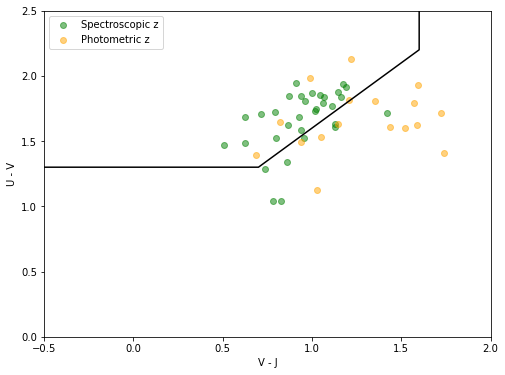

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
31 14 31 14


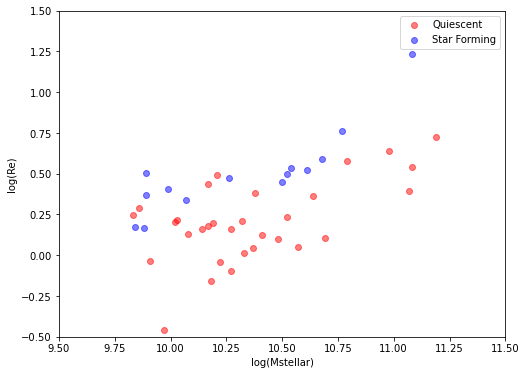

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
31 14 31 14


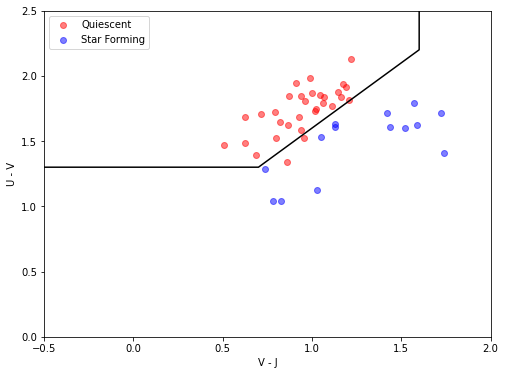

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
21 28 21 28


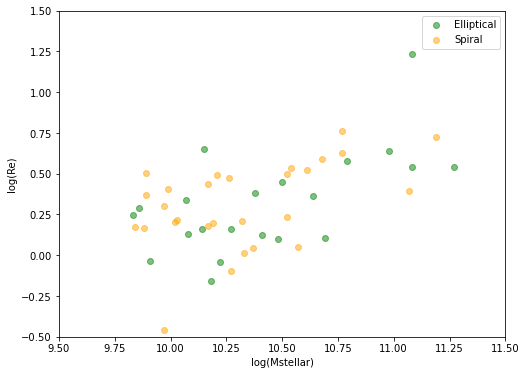

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
21 28 21 28


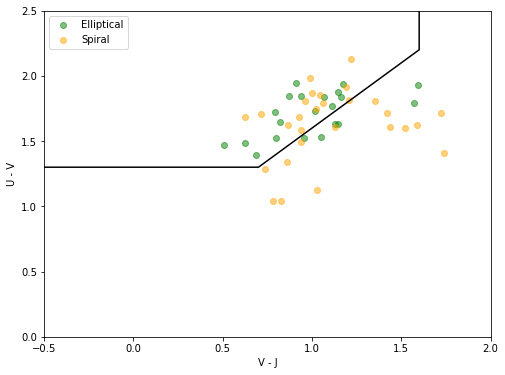

['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS0219'"]
25 0 25 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS0035'"]
63 0 63 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1634'"]
32 0 32 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
49 0 49 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SPT0546'"]
18 0 18 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1638'"]
26 0 26 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SPT0205'"]
36 0 36 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SPT2106'"]
102 0 102 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1051'"]
30 0 30 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS0335'"]
24 0 24 0
['member_adjusted == 1 or nonmember_adjusted == 1', "cluster == 'SpARCS1034'"]
32 0 32 0
['member_adjusted == 1 or no

<Figure size 576x432 with 0 Axes>

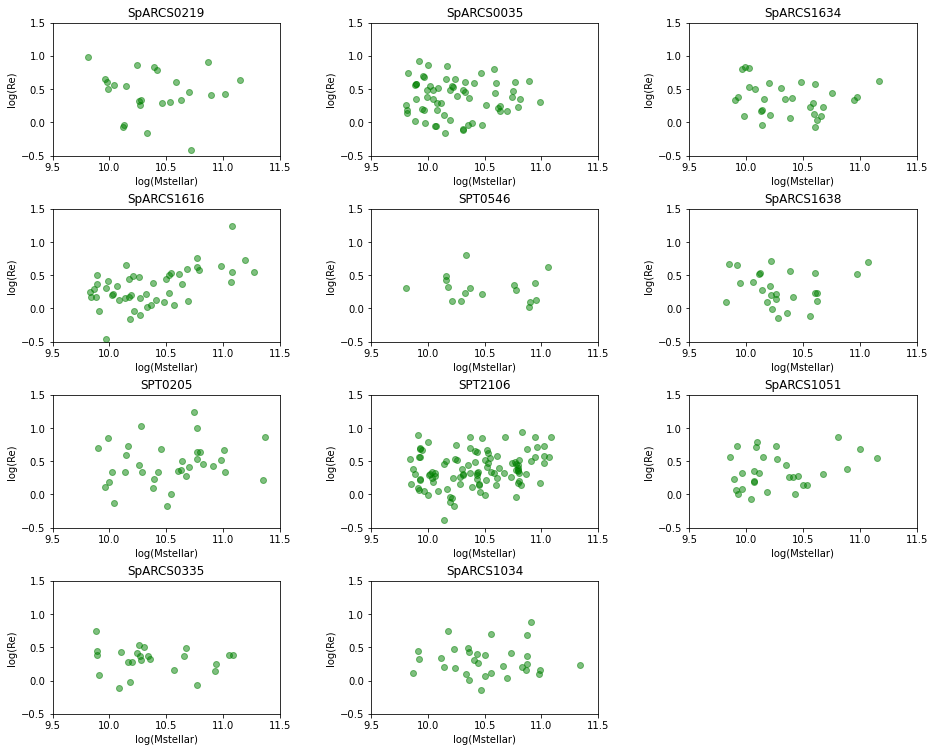

<Figure size 576x432 with 0 Axes>

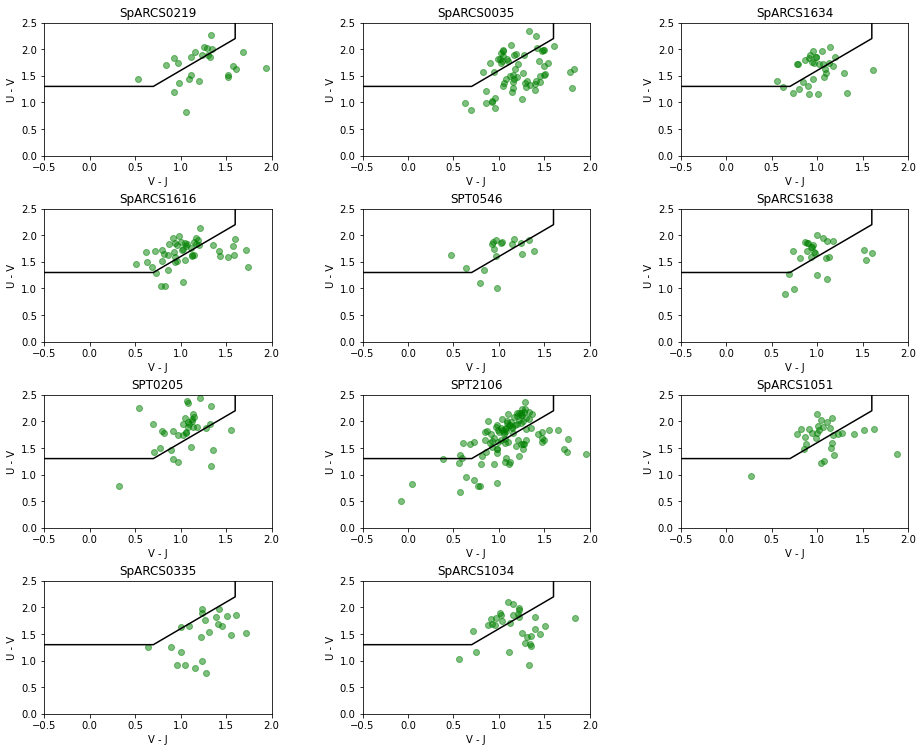

<Figure size 576x432 with 0 Axes>

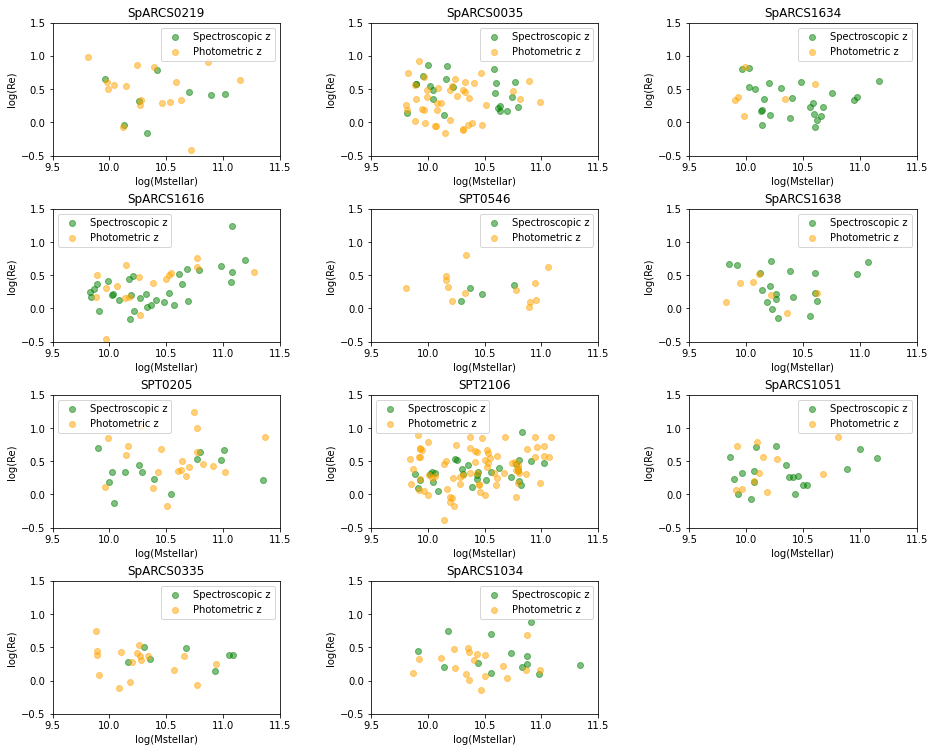

<Figure size 576x432 with 0 Axes>

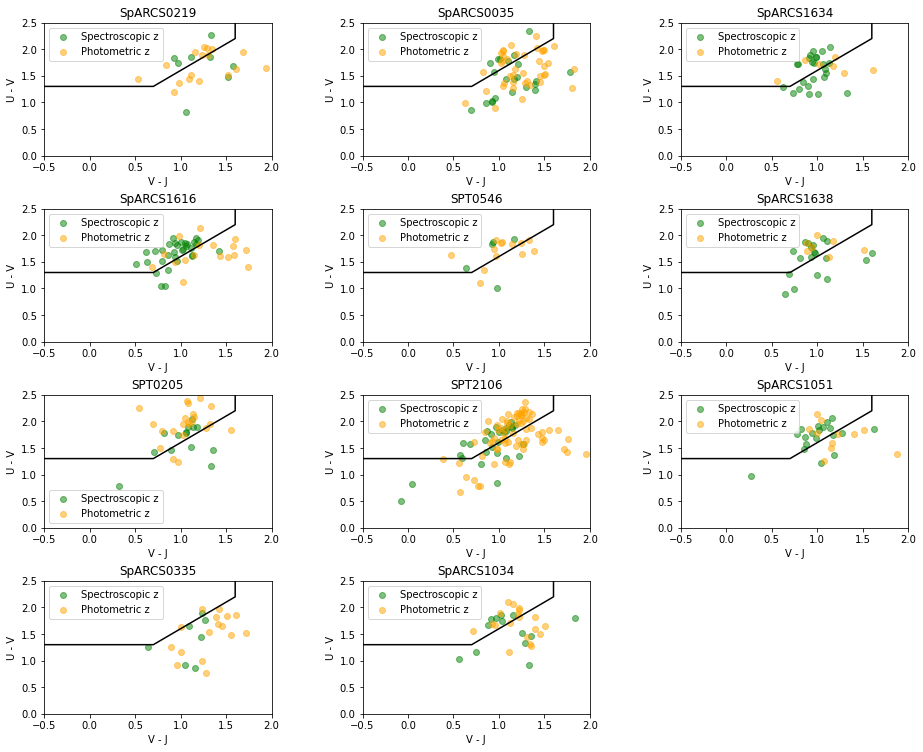

<Figure size 576x432 with 0 Axes>

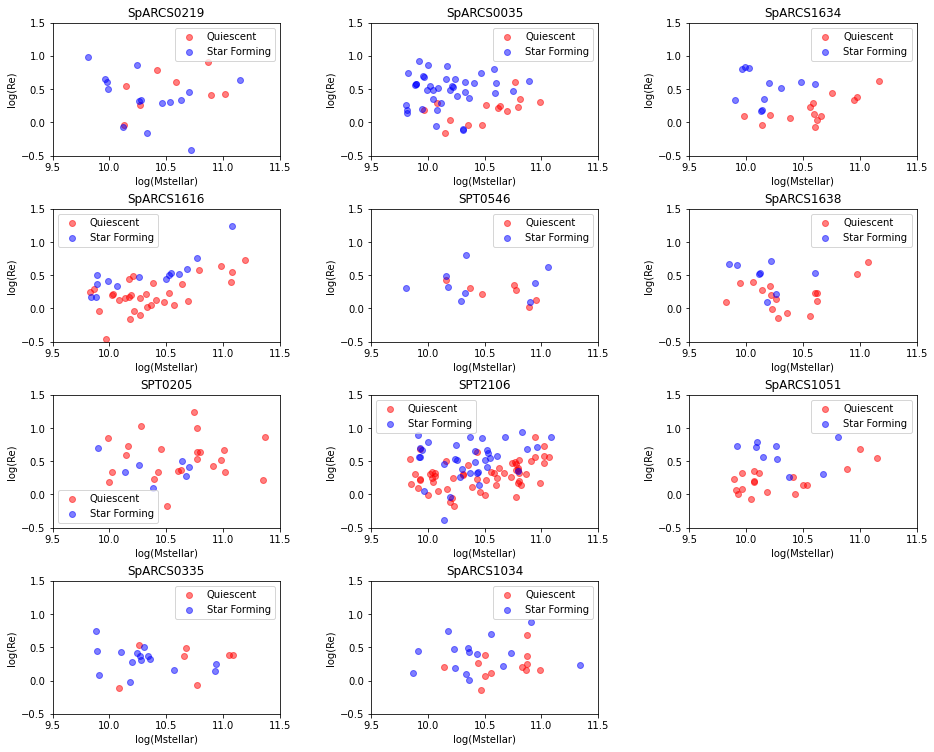

<Figure size 576x432 with 0 Axes>

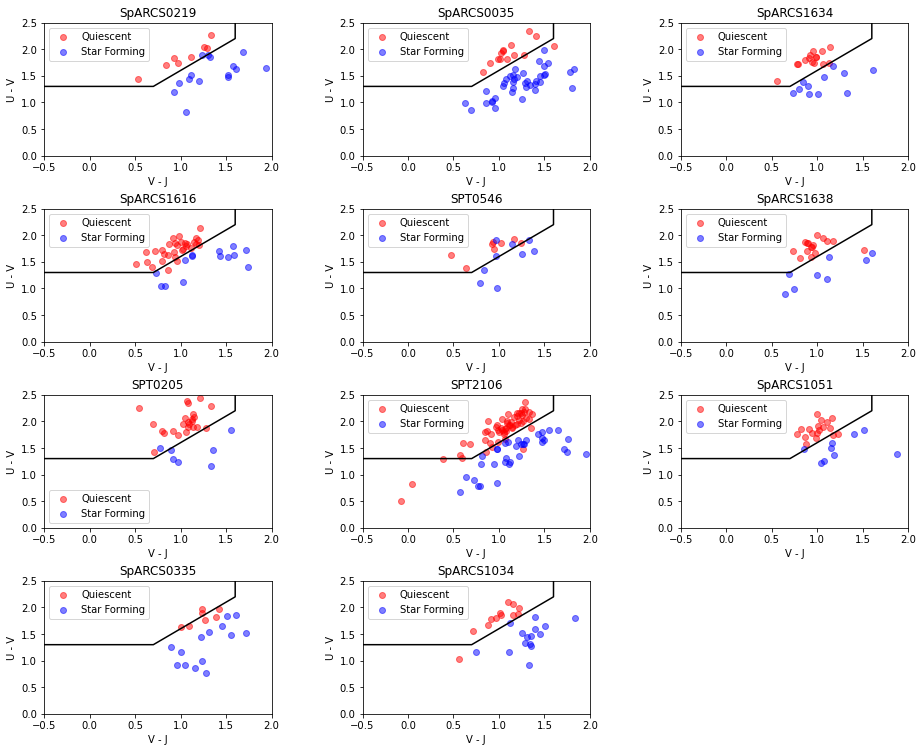

<Figure size 576x432 with 0 Axes>

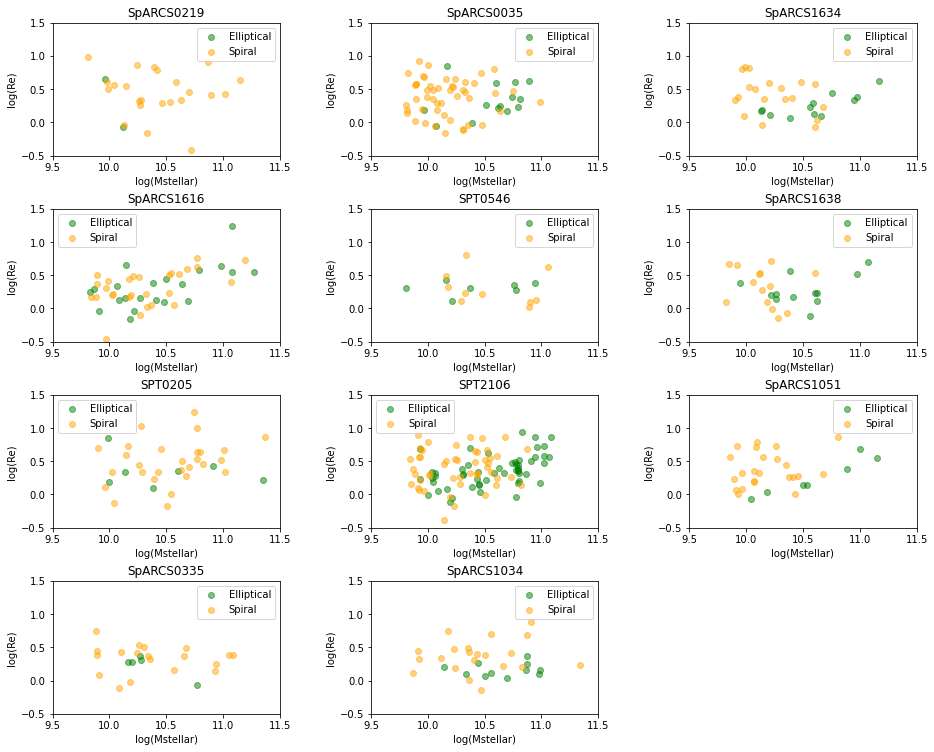

<Figure size 576x432 with 0 Axes>

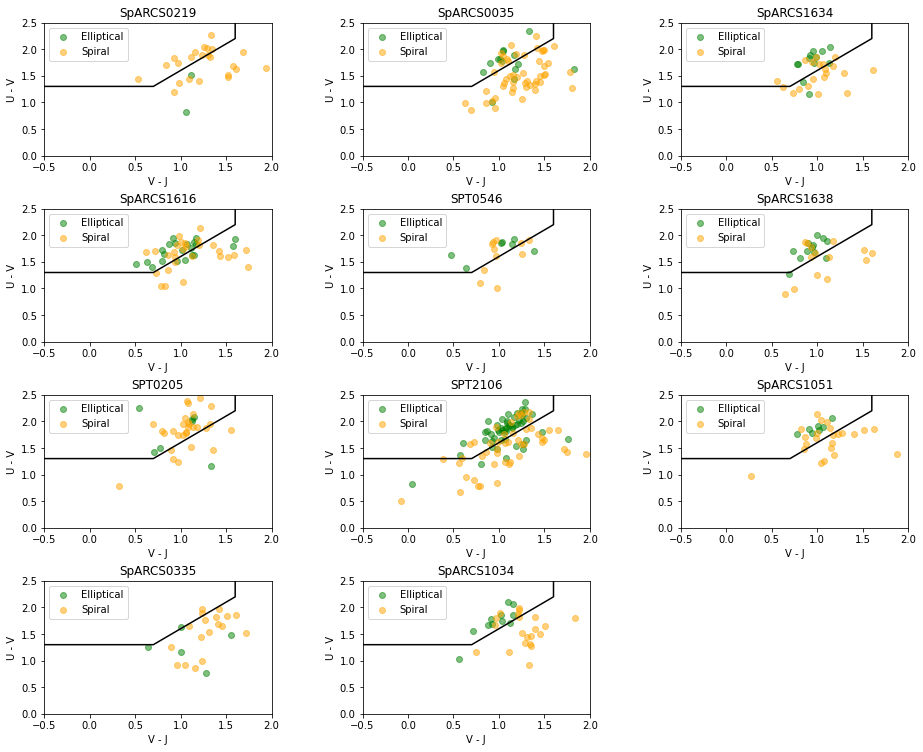

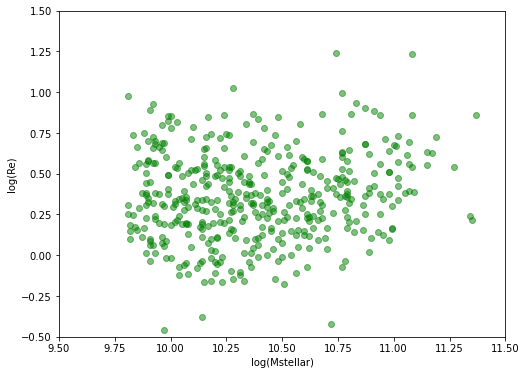

['member_adjusted == 1 or nonmember_adjusted == 1']
437 0 437 0


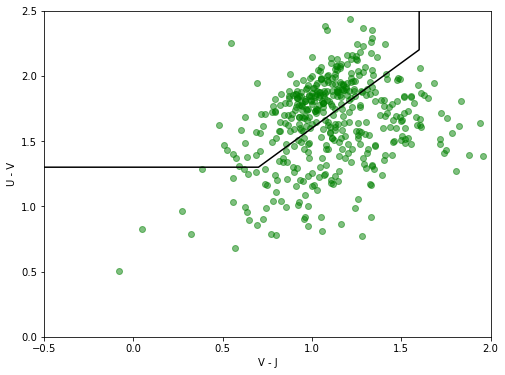

['member_adjusted == 1 or nonmember_adjusted == 1']
193 244 193 244


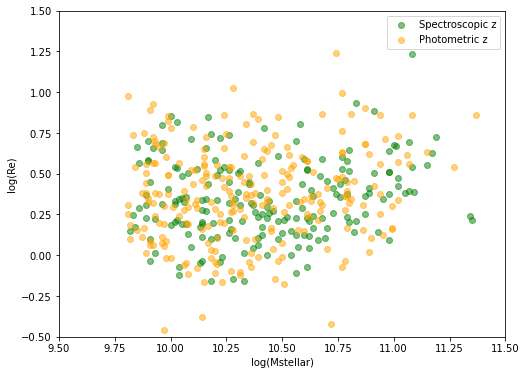

['member_adjusted == 1 or nonmember_adjusted == 1']
193 244 193 244


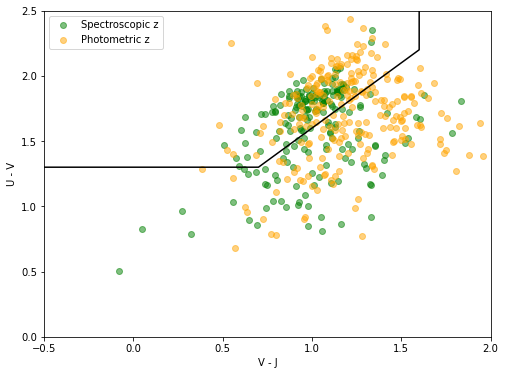

['member_adjusted == 1 or nonmember_adjusted == 1']
211 177 211 177


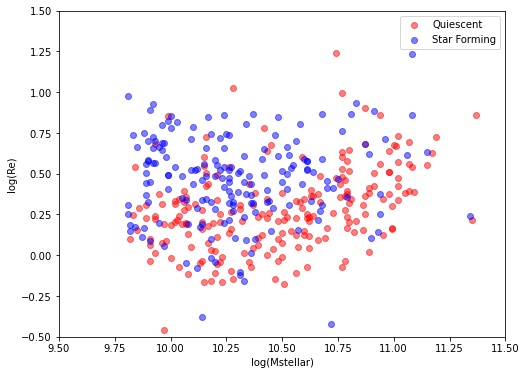

['member_adjusted == 1 or nonmember_adjusted == 1']
211 177 211 177


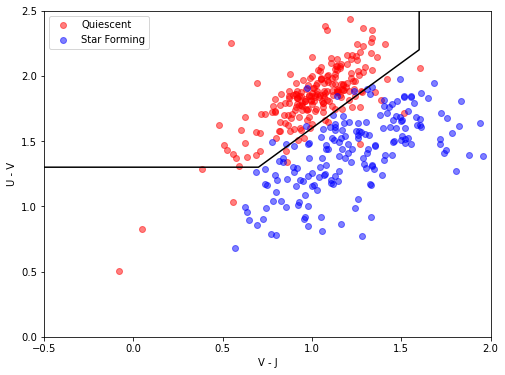

['member_adjusted == 1 or nonmember_adjusted == 1']
151 286 151 286


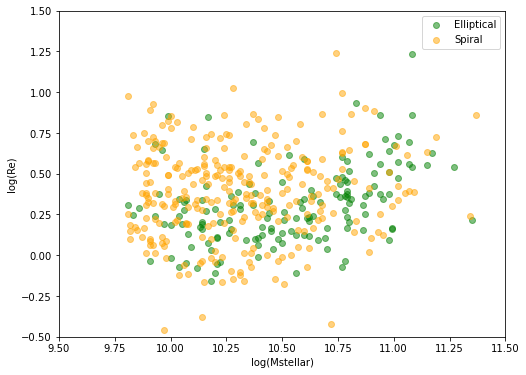

['member_adjusted == 1 or nonmember_adjusted == 1']
151 286 151 286


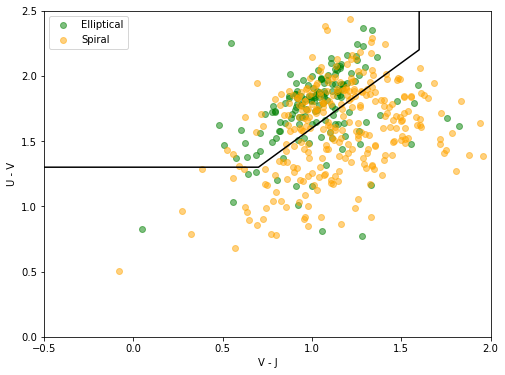

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
37 0 37 0


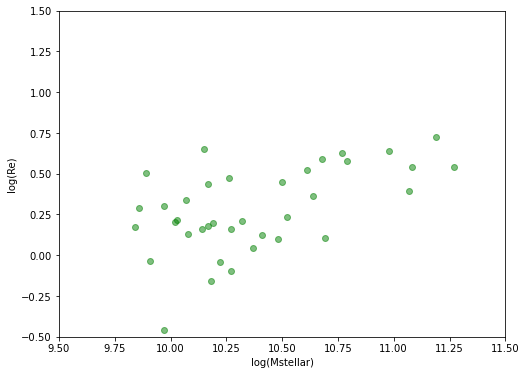

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
37 0 37 0


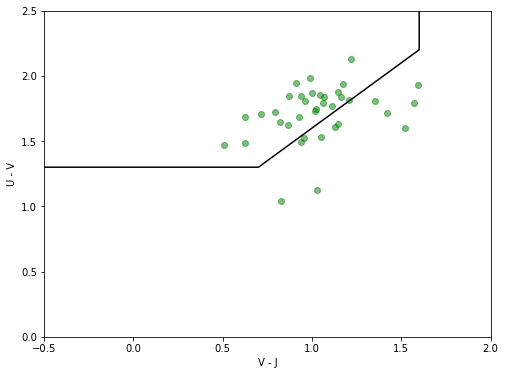

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
25 12 25 12


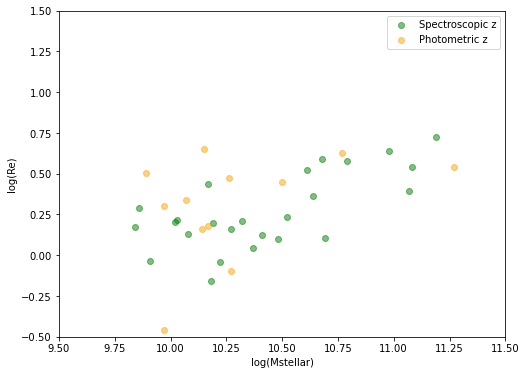

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
25 12 25 12


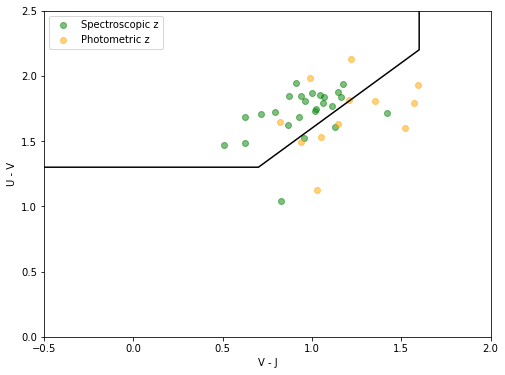

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
26 7 26 7


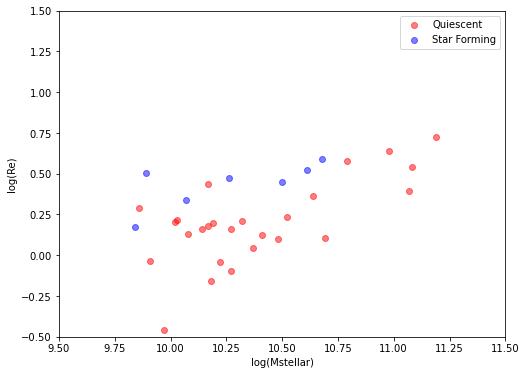

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
26 7 26 7


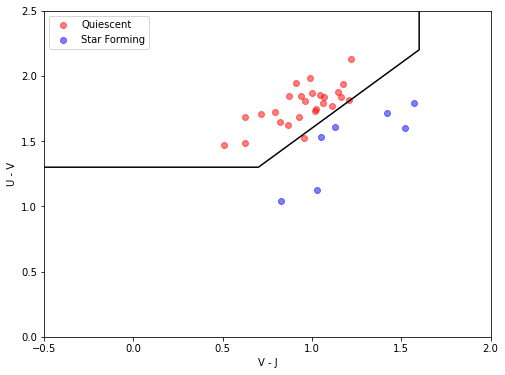

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
18 19 18 19


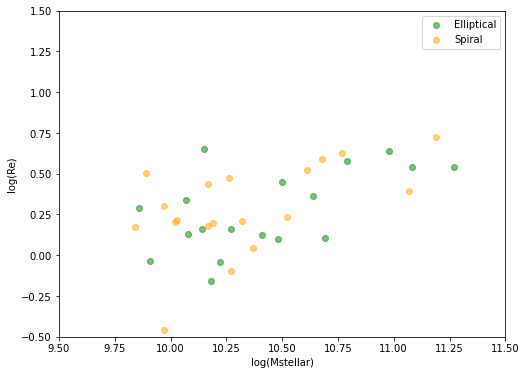

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
18 19 18 19


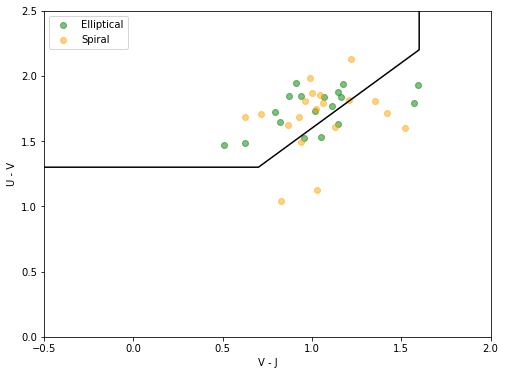

['member_adjusted == 1', "cluster == 'SpARCS0219'"]
8 0 8 0
['member_adjusted == 1', "cluster == 'SpARCS0035'"]
45 0 45 0
['member_adjusted == 1', "cluster == 'SpARCS1634'"]
23 0 23 0
['member_adjusted == 1', "cluster == 'SpARCS1616'"]
37 0 37 0
['member_adjusted == 1', "cluster == 'SPT0546'"]
7 0 7 0
['member_adjusted == 1', "cluster == 'SpARCS1638'"]
19 0 19 0
['member_adjusted == 1', "cluster == 'SPT0205'"]
18 0 18 0
['member_adjusted == 1', "cluster == 'SPT2106'"]
81 0 81 0
['member_adjusted == 1', "cluster == 'SpARCS1051'"]
21 0 21 0
['member_adjusted == 1', "cluster == 'SpARCS0335'"]
3 0 3 0
['member_adjusted == 1', "cluster == 'SpARCS1034'"]
26 0 26 0
['member_adjusted == 1', "cluster == 'SpARCS0219'"]
8 0 8 0
['member_adjusted == 1', "cluster == 'SpARCS0035'"]
45 0 45 0
['member_adjusted == 1', "cluster == 'SpARCS1634'"]
23 0 23 0
['member_adjusted == 1', "cluster == 'SpARCS1616'"]
37 0 37 0
['member_adjusted == 1', "cluster == 'SPT0546'"]
7 0 7 0
['member_adjusted == 1', "clus

<Figure size 576x432 with 0 Axes>

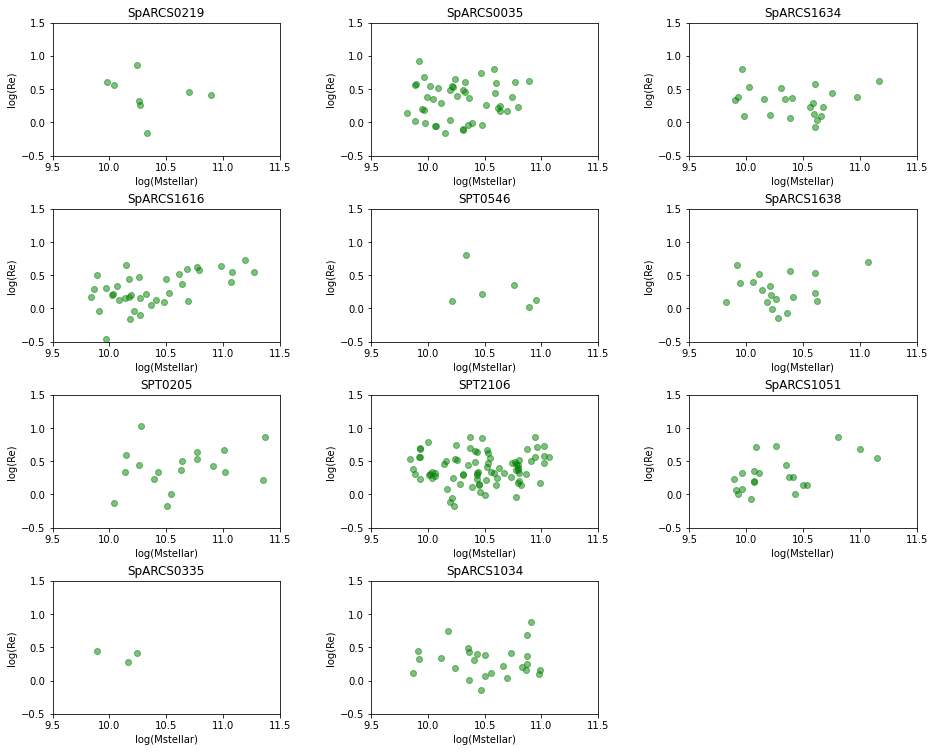

<Figure size 576x432 with 0 Axes>

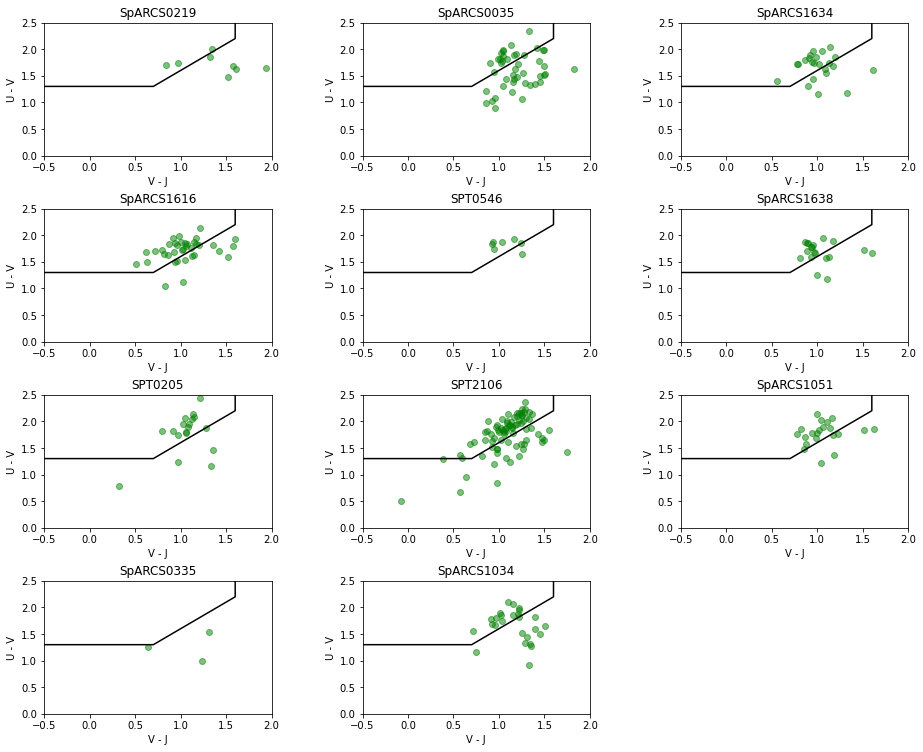

<Figure size 576x432 with 0 Axes>

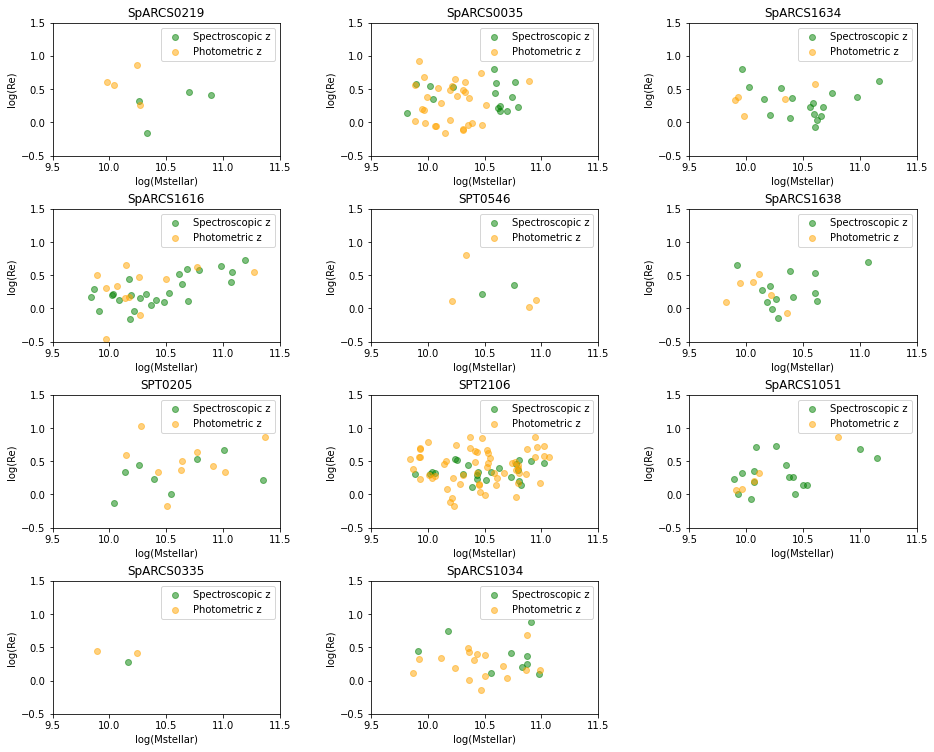

<Figure size 576x432 with 0 Axes>

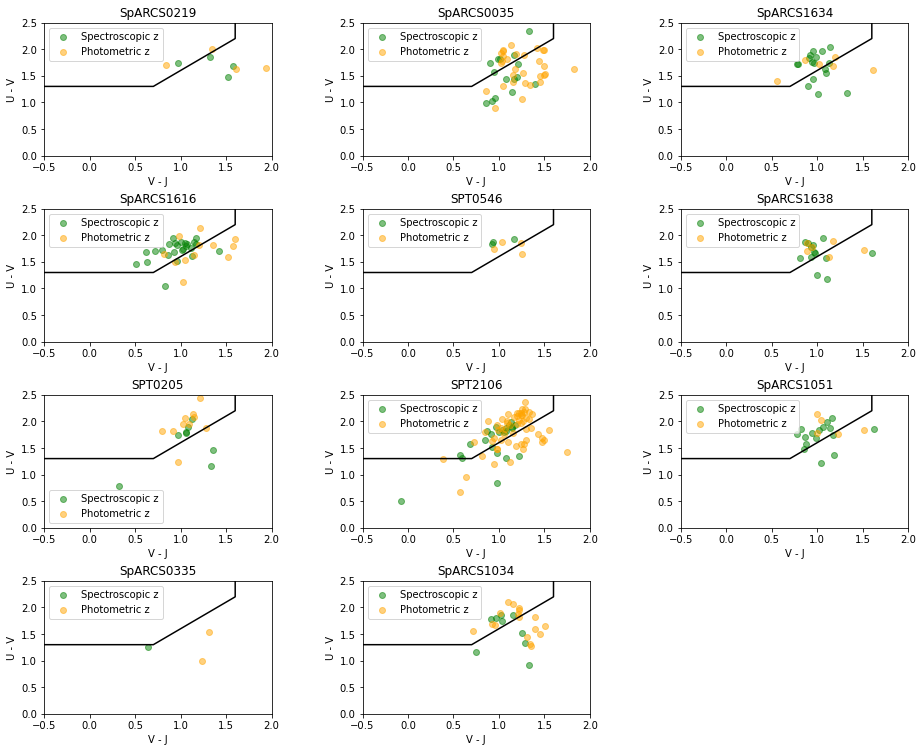

<Figure size 576x432 with 0 Axes>

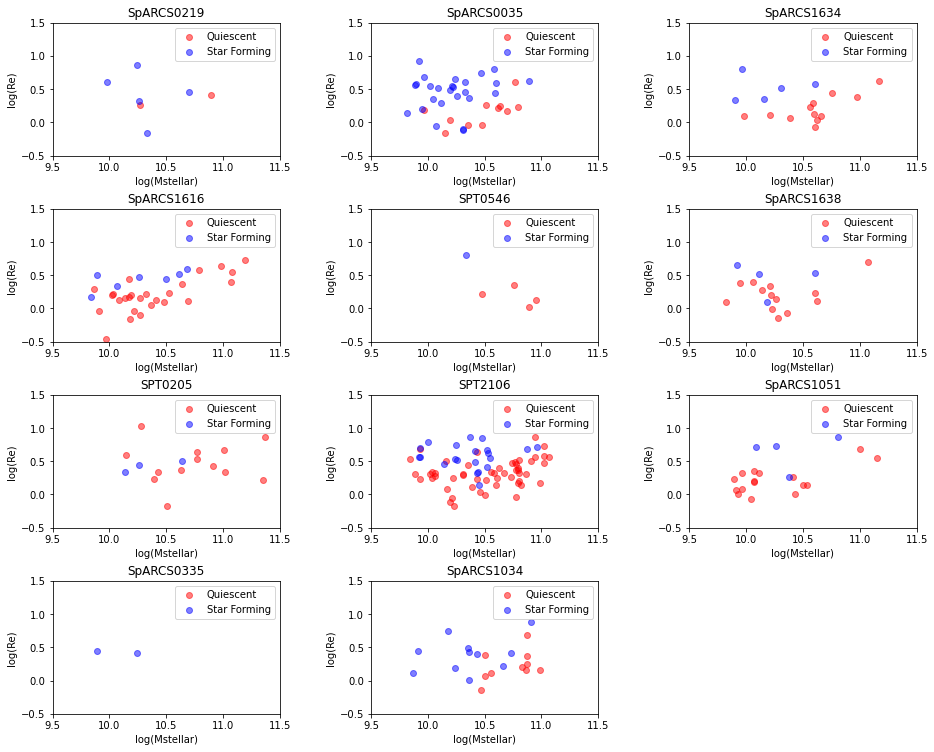

<Figure size 576x432 with 0 Axes>

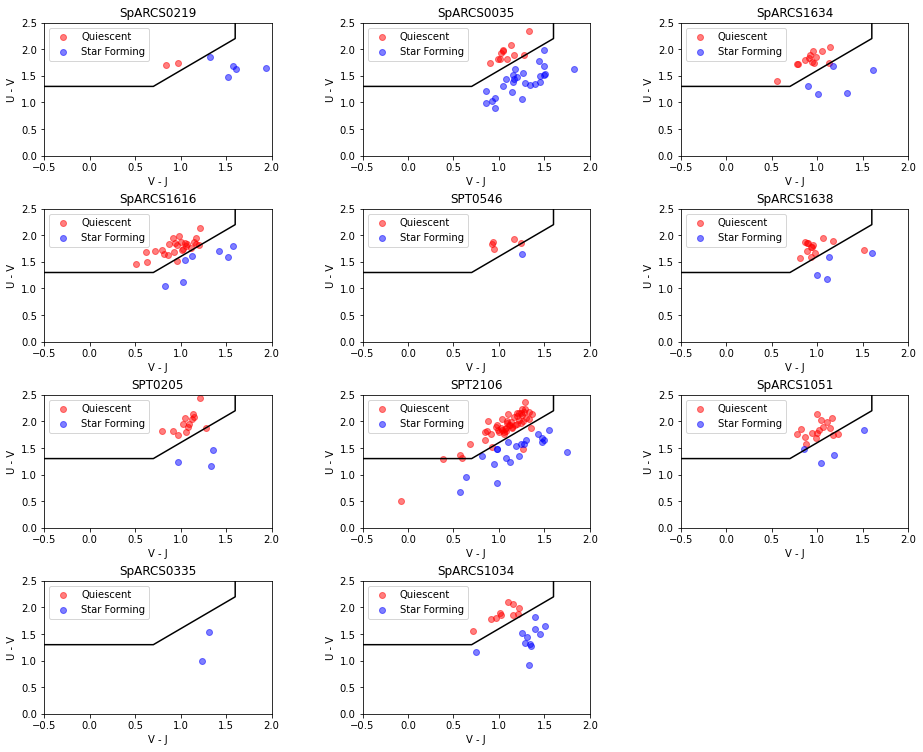

<Figure size 576x432 with 0 Axes>

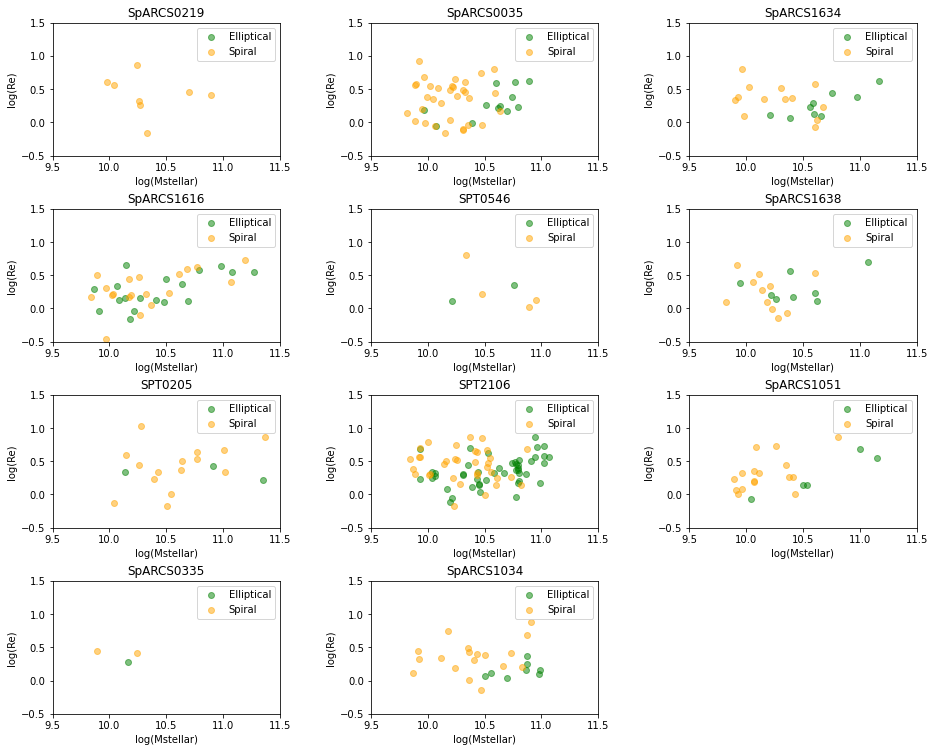

<Figure size 576x432 with 0 Axes>

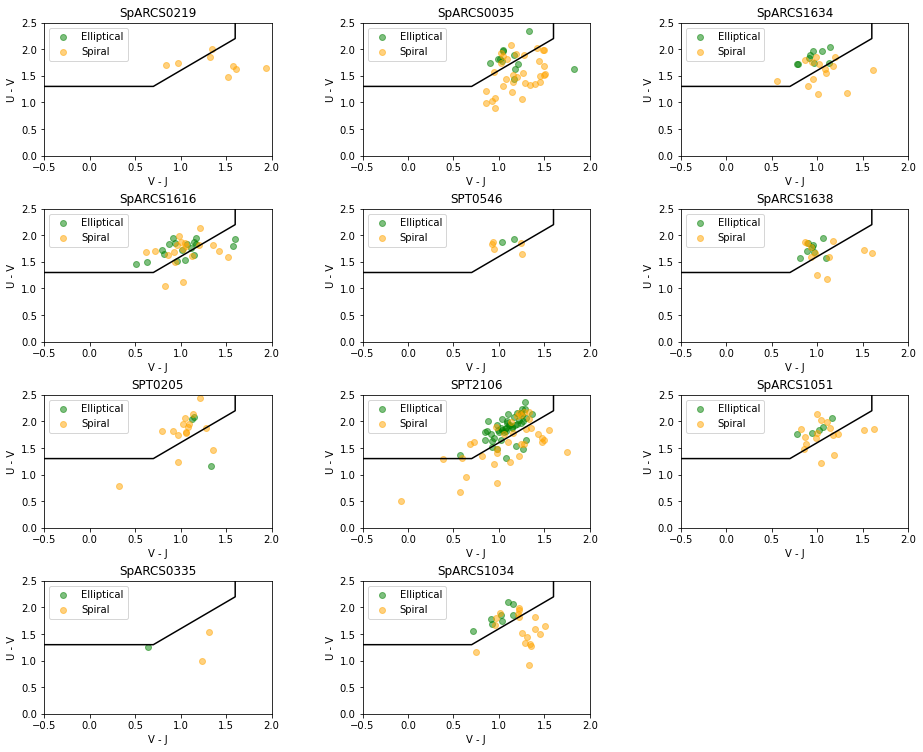

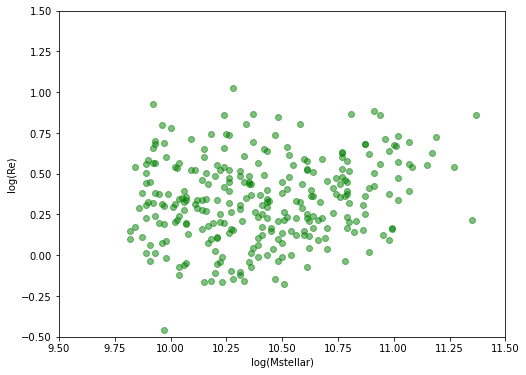

['member_adjusted == 1']
288 0 288 0


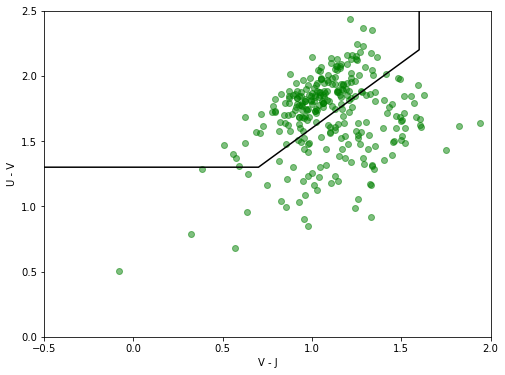

['member_adjusted == 1']
134 154 134 154


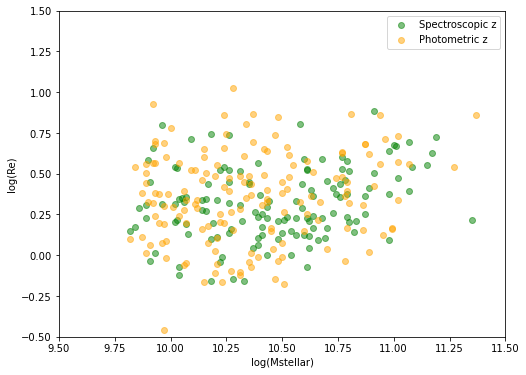

['member_adjusted == 1']
134 154 134 154


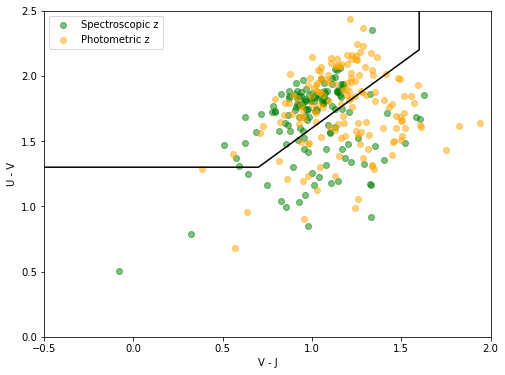

['member_adjusted == 1']
161 89 161 89


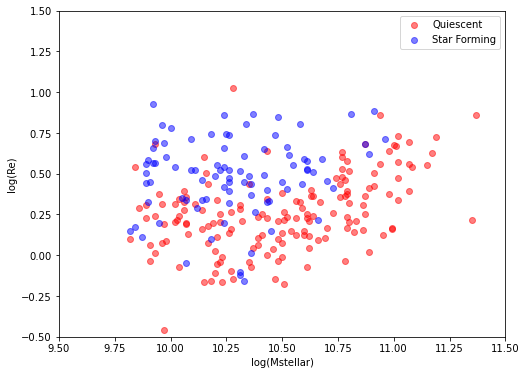

['member_adjusted == 1']
161 89 161 89


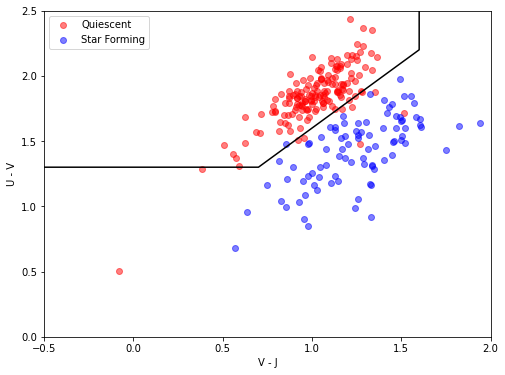

['member_adjusted == 1']
112 176 112 176


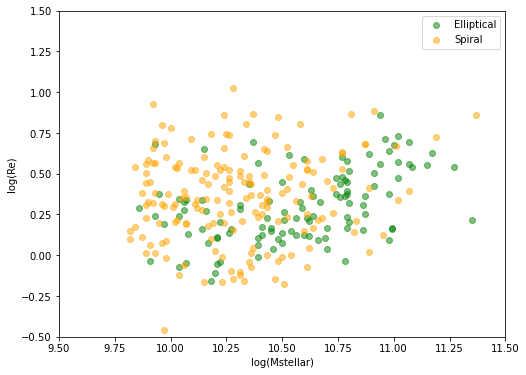

['member_adjusted == 1']
112 176 112 176


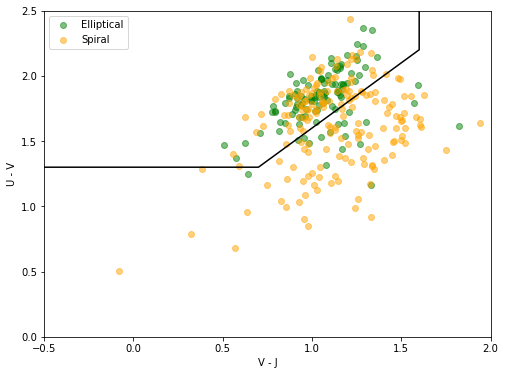

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
12 0 12 0


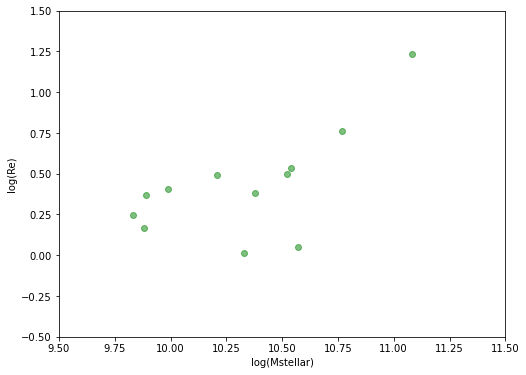

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
12 0 12 0


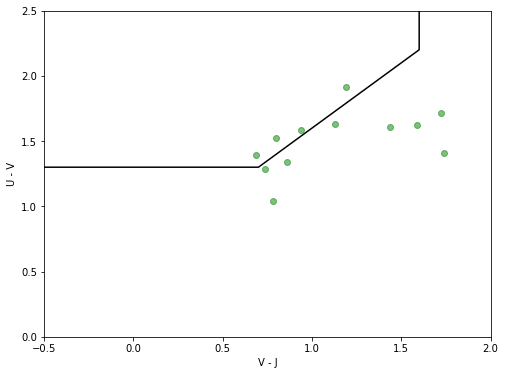

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
7 5 7 5


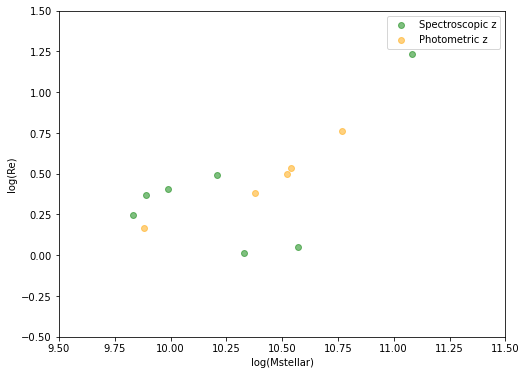

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
7 5 7 5


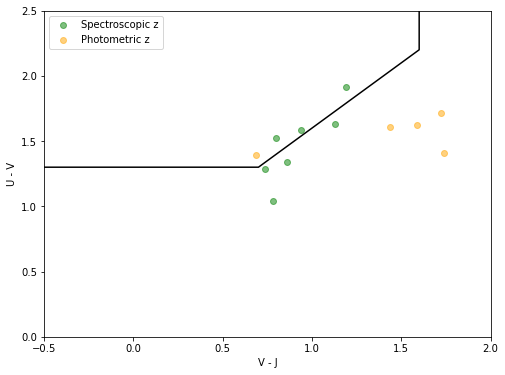

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
5 7 5 7


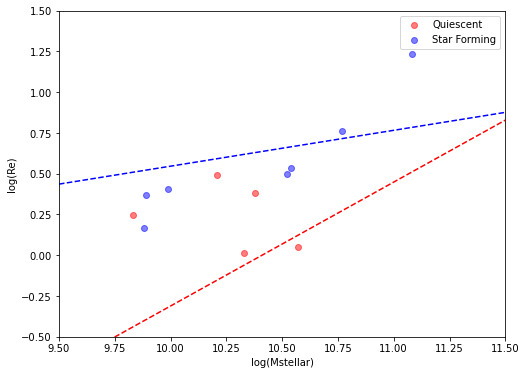

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
5 7 5 7


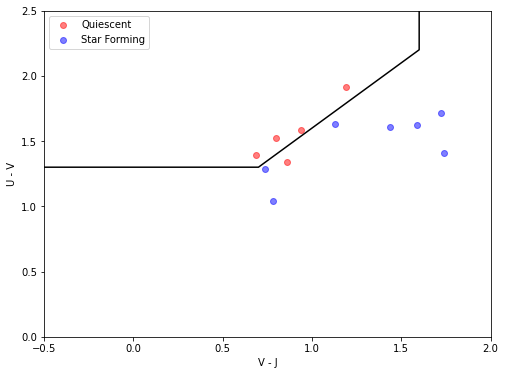

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
3 9 3 9


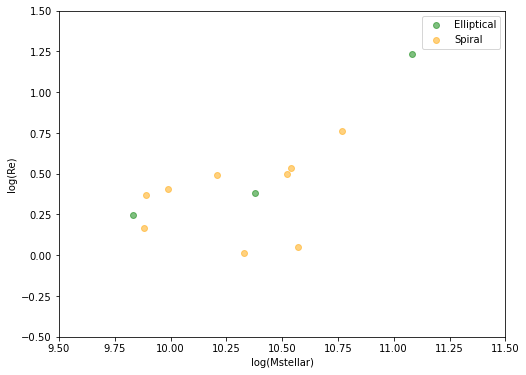

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
3 9 3 9


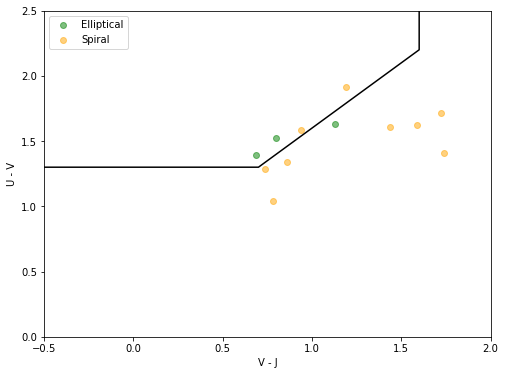

['nonmember_adjusted == 1', "cluster == 'SpARCS0219'"]
17 0 17 0
['nonmember_adjusted == 1', "cluster == 'SpARCS0035'"]
18 0 18 0
['nonmember_adjusted == 1', "cluster == 'SpARCS1634'"]
9 0 9 0
['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
12 0 12 0
['nonmember_adjusted == 1', "cluster == 'SPT0546'"]
11 0 11 0
['nonmember_adjusted == 1', "cluster == 'SpARCS1638'"]
7 0 7 0
['nonmember_adjusted == 1', "cluster == 'SPT0205'"]
18 0 18 0
['nonmember_adjusted == 1', "cluster == 'SPT2106'"]
21 0 21 0
['nonmember_adjusted == 1', "cluster == 'SpARCS1051'"]
9 0 9 0
['nonmember_adjusted == 1', "cluster == 'SpARCS0335'"]
21 0 21 0
['nonmember_adjusted == 1', "cluster == 'SpARCS1034'"]
6 0 6 0
['nonmember_adjusted == 1', "cluster == 'SpARCS0219'"]
17 0 17 0
['nonmember_adjusted == 1', "cluster == 'SpARCS0035'"]
18 0 18 0
['nonmember_adjusted == 1', "cluster == 'SpARCS1634'"]
9 0 9 0
['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
12 0 12 0
['nonmember_adjusted == 1', "cluster == 'SPT

<Figure size 576x432 with 0 Axes>

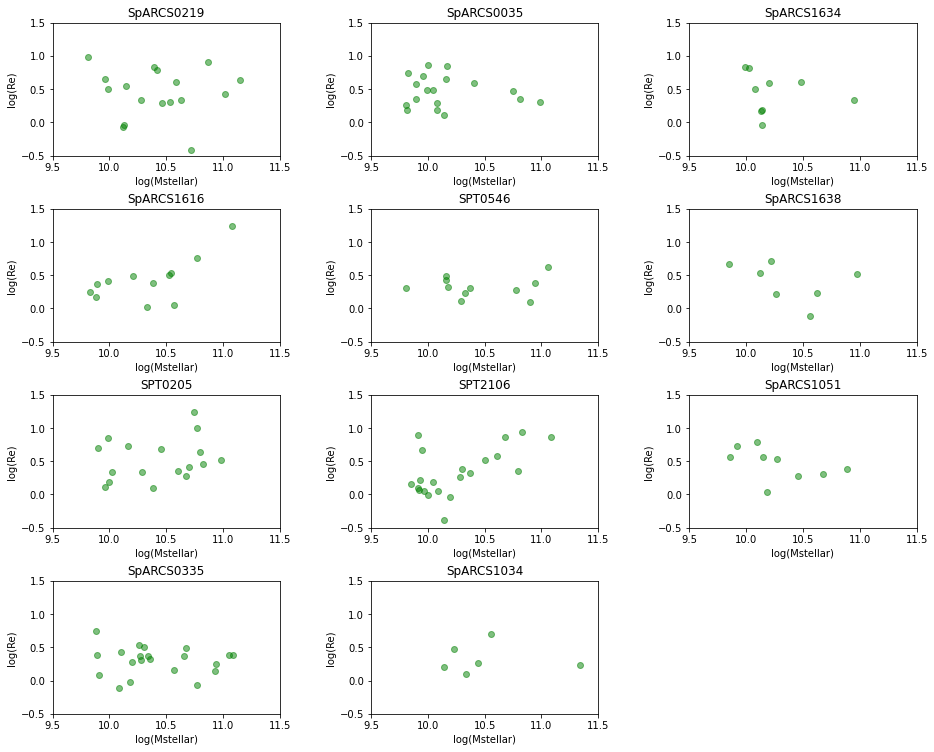

<Figure size 576x432 with 0 Axes>

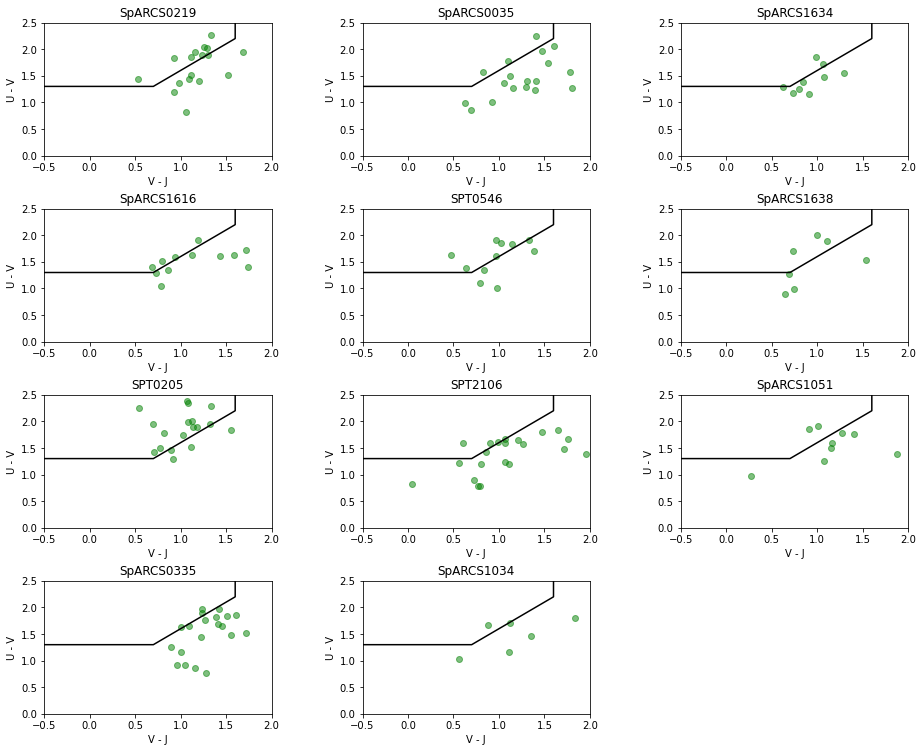

<Figure size 576x432 with 0 Axes>

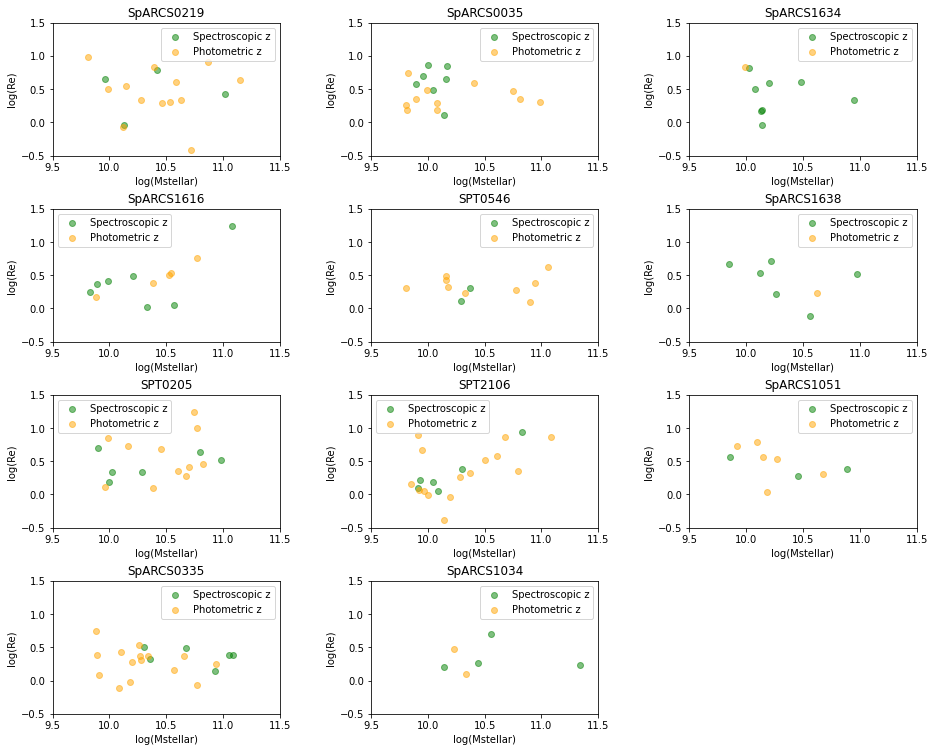

<Figure size 576x432 with 0 Axes>

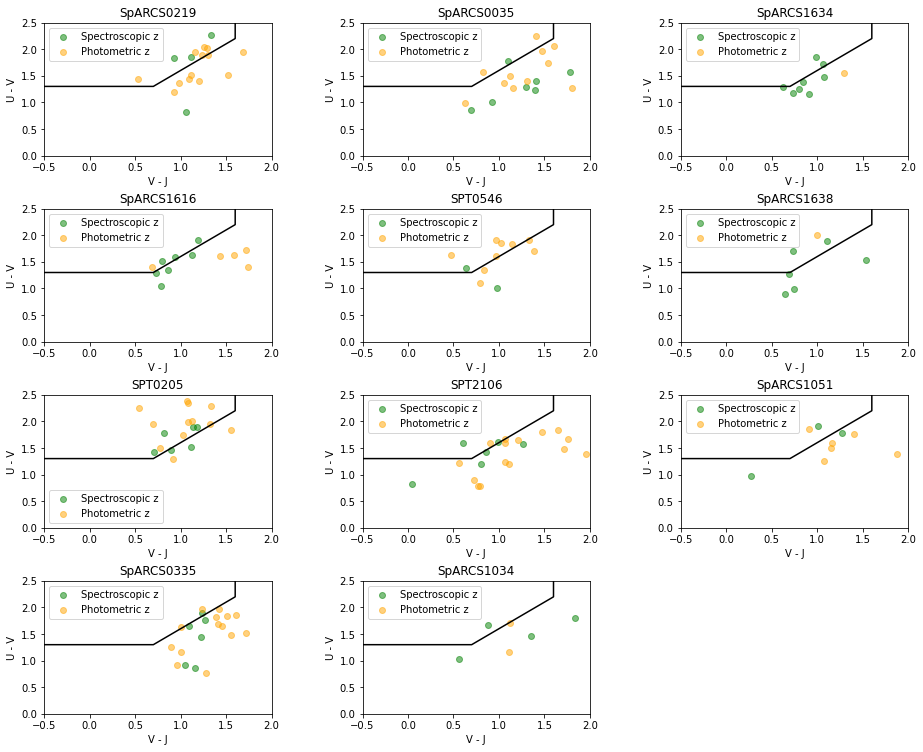

<Figure size 576x432 with 0 Axes>

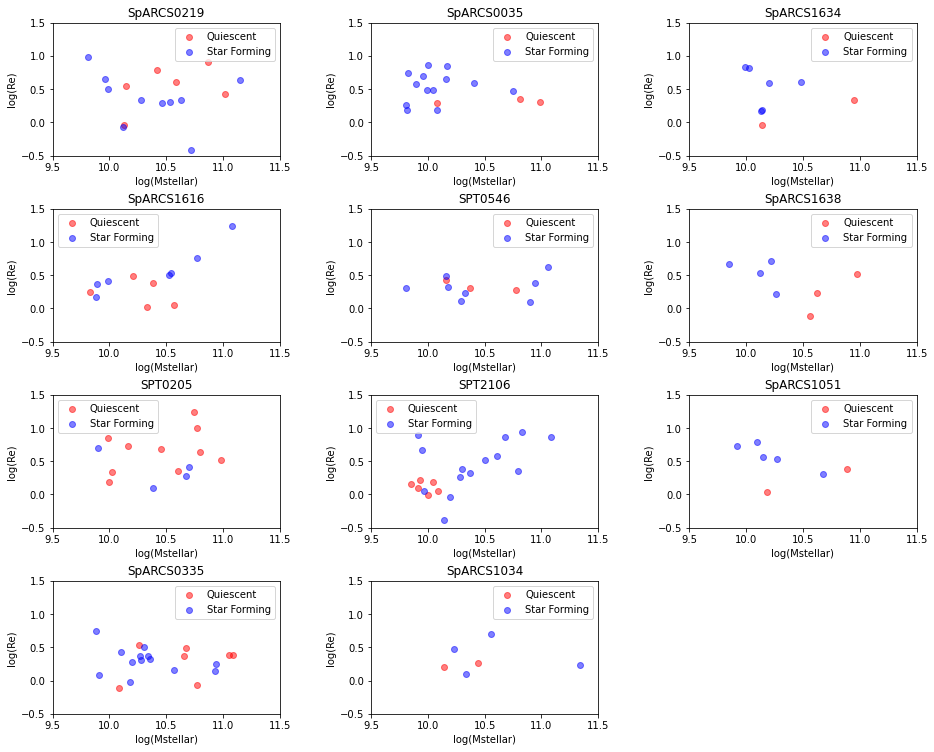

<Figure size 576x432 with 0 Axes>

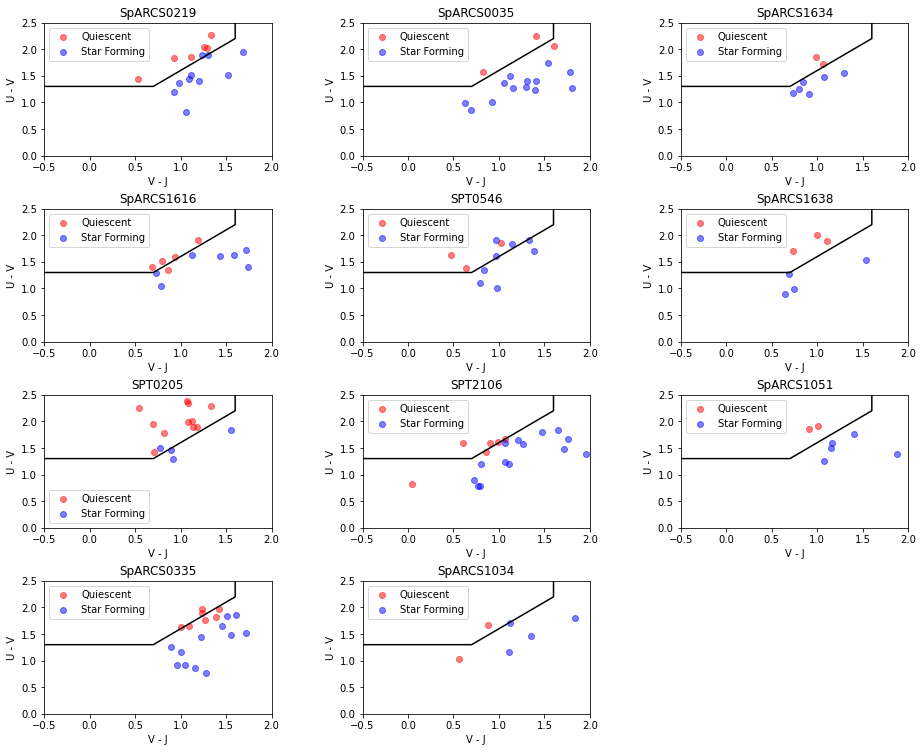

<Figure size 576x432 with 0 Axes>

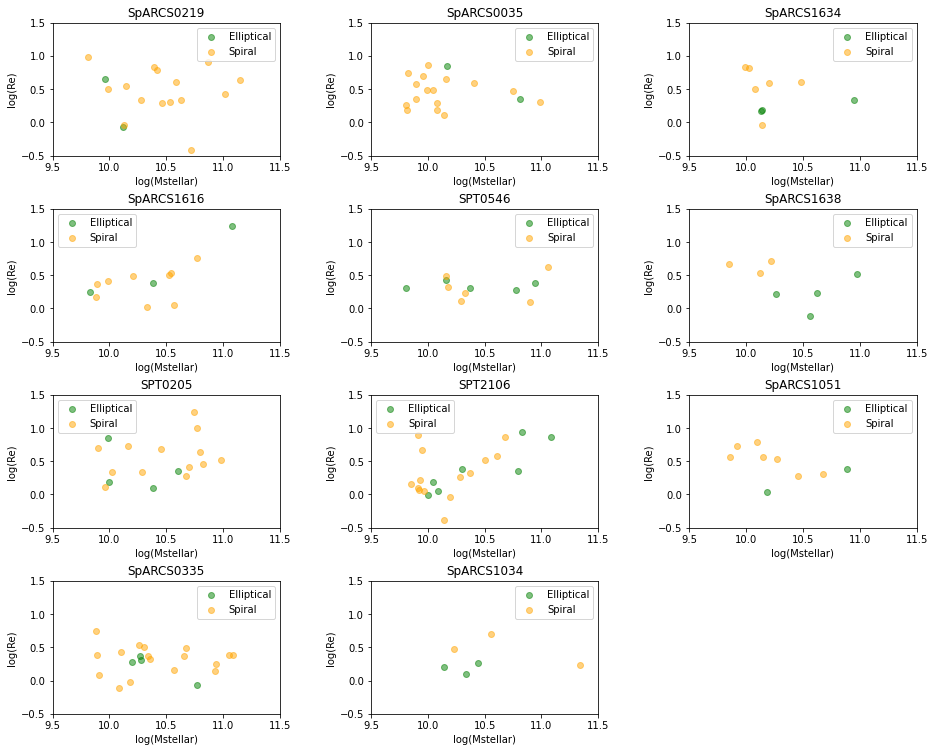

<Figure size 576x432 with 0 Axes>

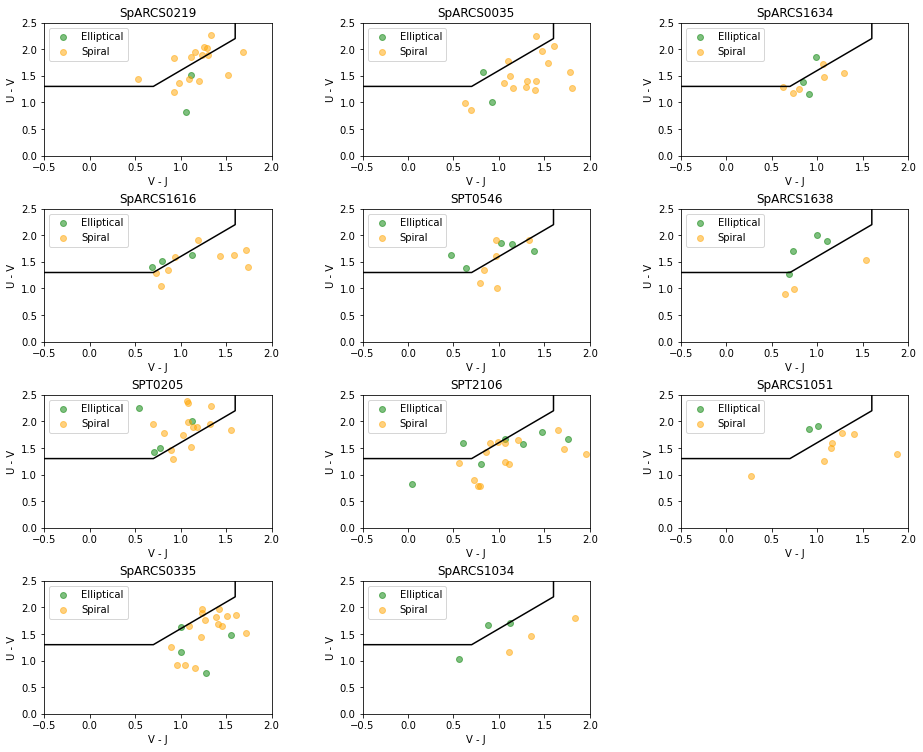

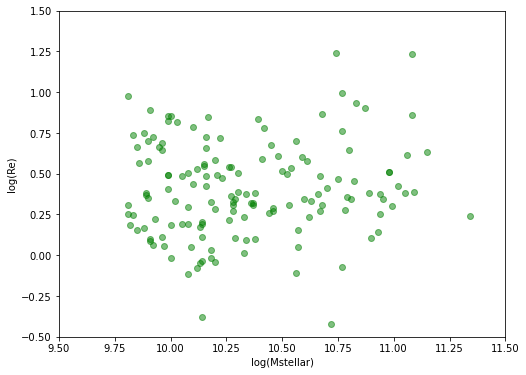

['nonmember_adjusted == 1']
149 0 149 0


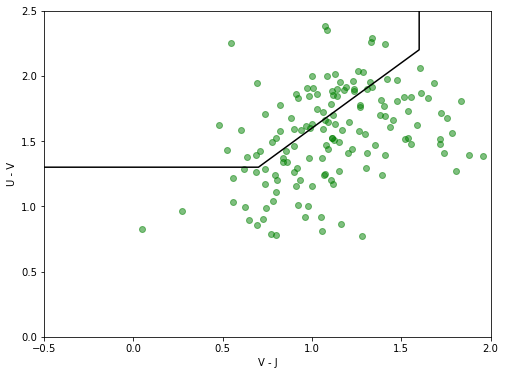

['nonmember_adjusted == 1']
59 90 59 90


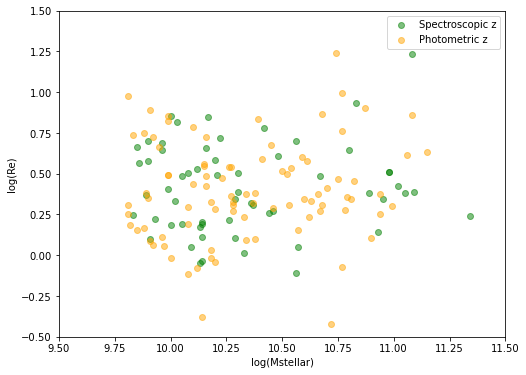

['nonmember_adjusted == 1']
59 90 59 90


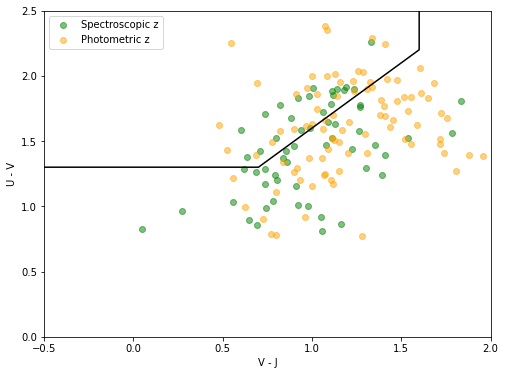

['nonmember_adjusted == 1']
50 88 50 88


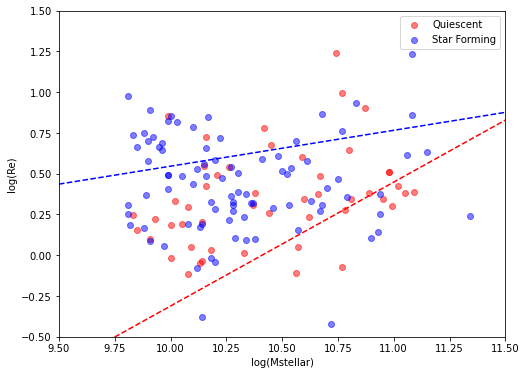

['nonmember_adjusted == 1']
50 88 50 88


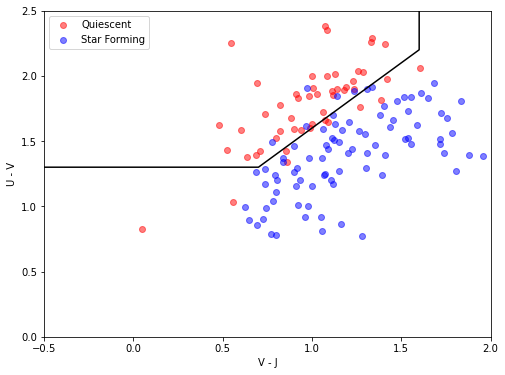

['nonmember_adjusted == 1']
39 110 39 110


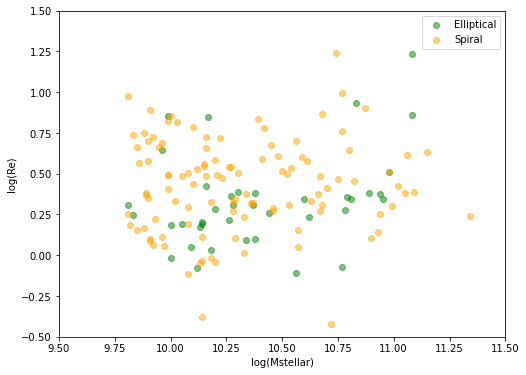

['nonmember_adjusted == 1']
39 110 39 110


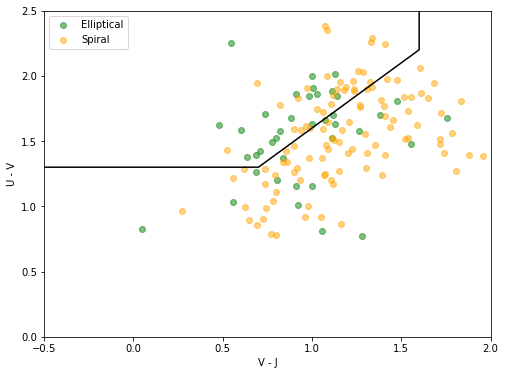

['member_adjusted == 1', "cluster == 'SpARCS0219'"]
0 8 0 8


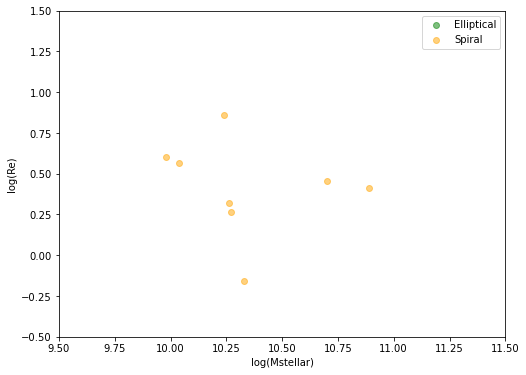

['member_adjusted == 1', "cluster == 'SpARCS0035'"]
12 33 12 33


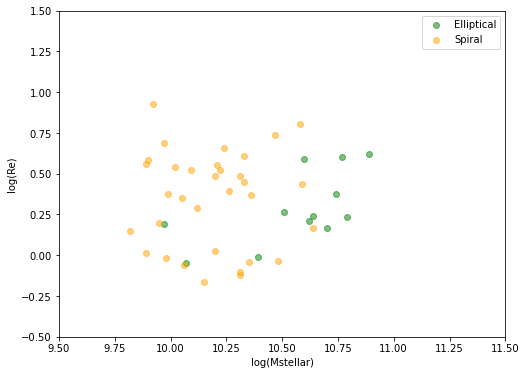

['member_adjusted == 1', "cluster == 'SpARCS1634'"]
9 14 9 14


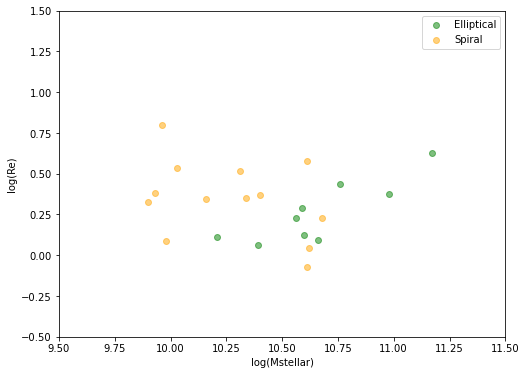

['member_adjusted == 1', "cluster == 'SpARCS1616'"]
18 19 18 19


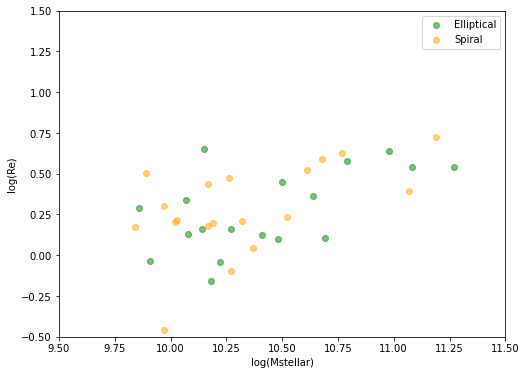

['member_adjusted == 1', "cluster == 'SPT0546'"]
2 5 2 5


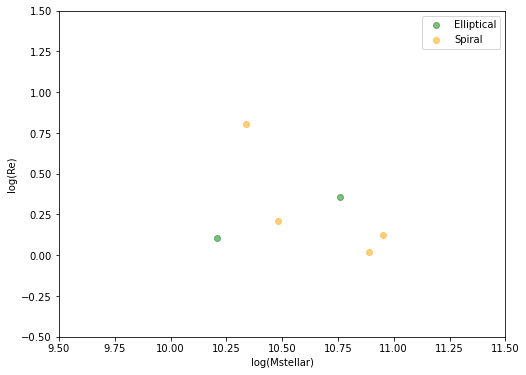

['member_adjusted == 1', "cluster == 'SpARCS1638'"]
8 11 8 11


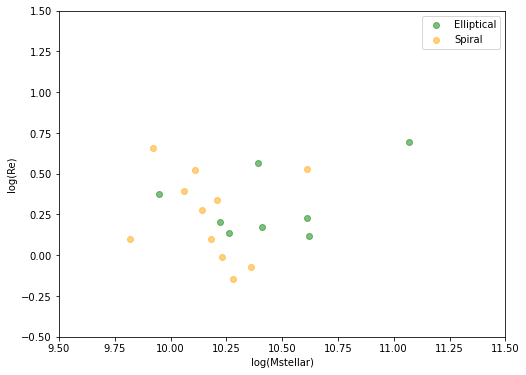

['member_adjusted == 1', "cluster == 'SPT0205'"]
3 15 3 15


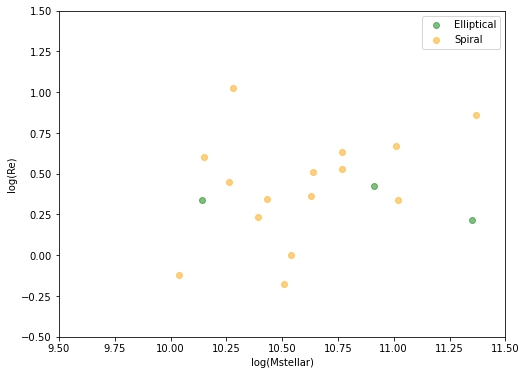

['member_adjusted == 1', "cluster == 'SPT2106'"]
46 35 46 35


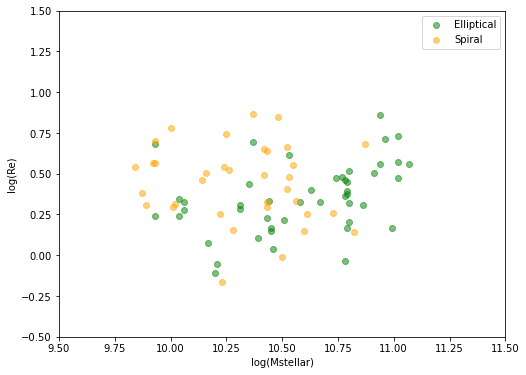

['member_adjusted == 1', "cluster == 'SpARCS1051'"]
5 16 5 16


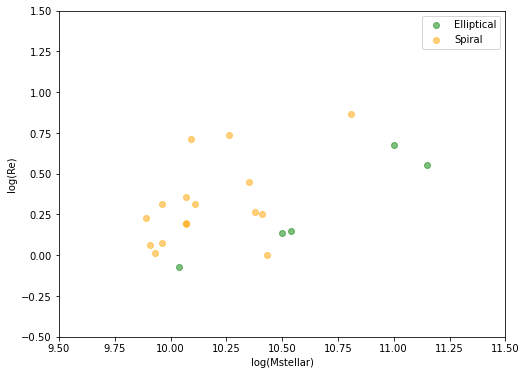

['member_adjusted == 1', "cluster == 'SpARCS0335'"]
1 2 1 2


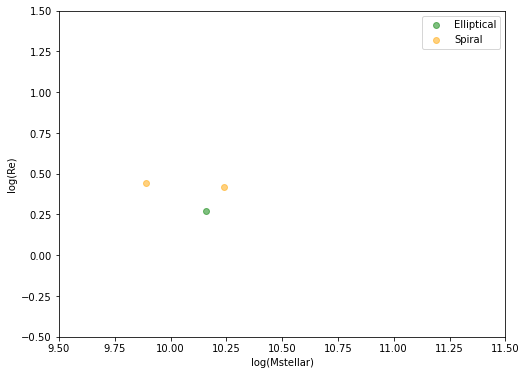

['member_adjusted == 1', "cluster == 'SpARCS1034'"]
8 18 8 18


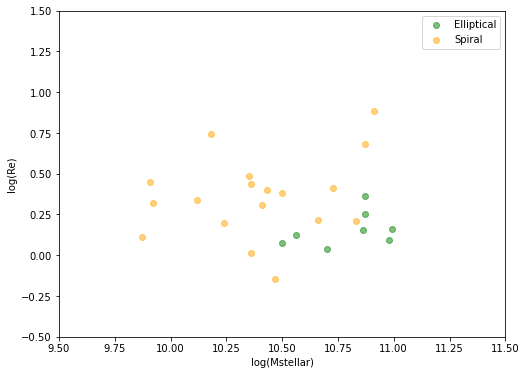

['member_adjusted == 1']
112 176 112 176


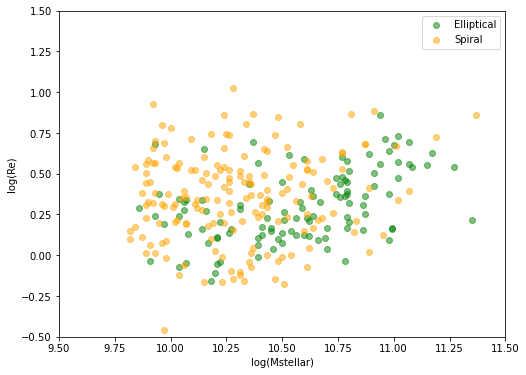

['nonmember_adjusted == 1', "cluster == 'SpARCS0219'"]
2 15 2 15


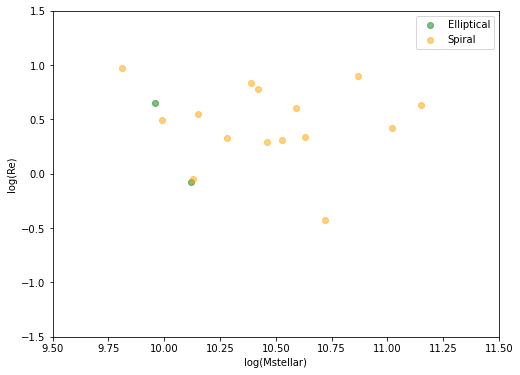

['nonmember_adjusted == 1', "cluster == 'SpARCS0035'"]
2 16 2 16


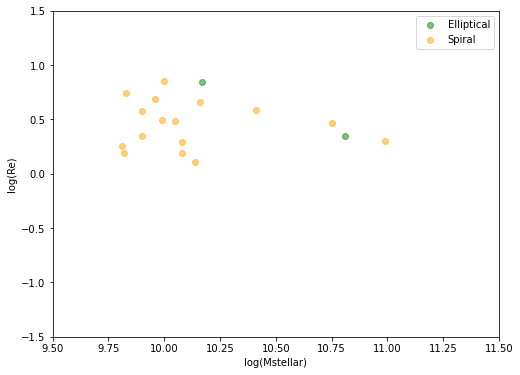

['nonmember_adjusted == 1', "cluster == 'SpARCS1634'"]
3 6 3 6


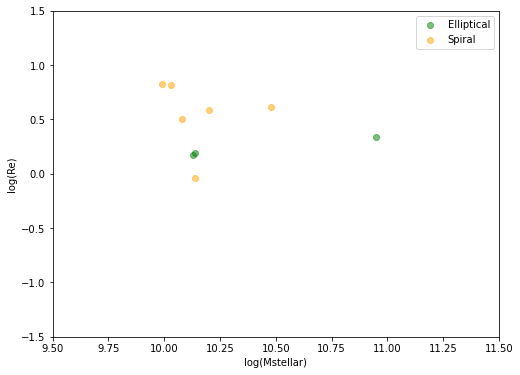

['nonmember_adjusted == 1', "cluster == 'SpARCS1616'"]
3 9 3 9


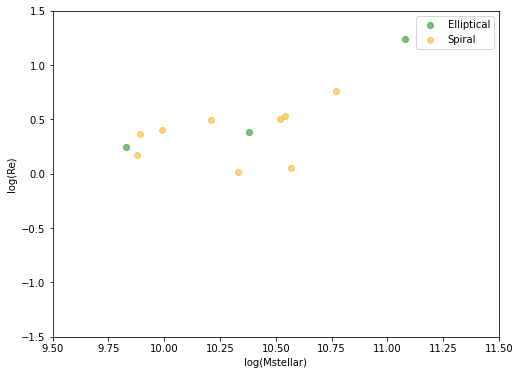

['nonmember_adjusted == 1', "cluster == 'SPT0546'"]
5 6 5 6


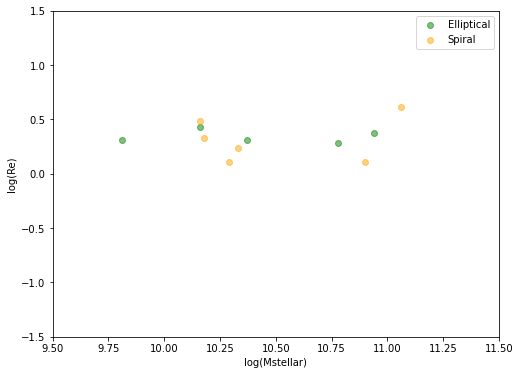

['nonmember_adjusted == 1', "cluster == 'SpARCS1638'"]
4 3 4 3


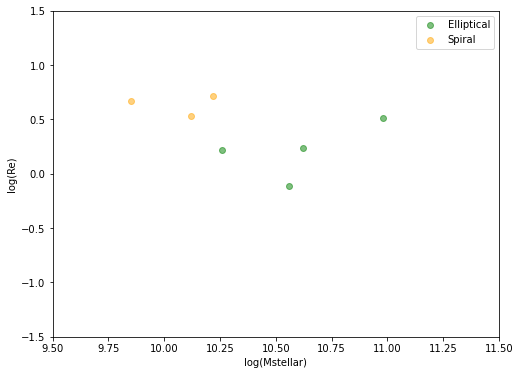

['nonmember_adjusted == 1', "cluster == 'SPT0205'"]
4 14 4 14


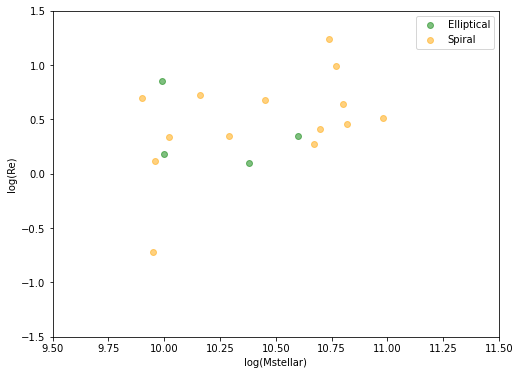

['nonmember_adjusted == 1', "cluster == 'SPT2106'"]
7 14 7 14


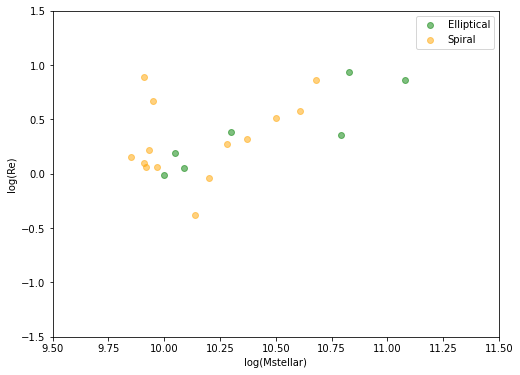

['nonmember_adjusted == 1', "cluster == 'SpARCS1051'"]
2 7 2 7


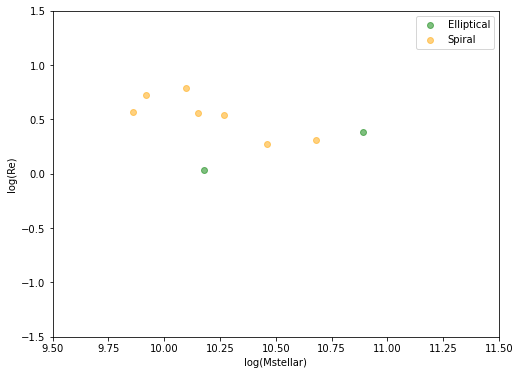

['nonmember_adjusted == 1', "cluster == 'SpARCS0335'"]
4 17 4 17


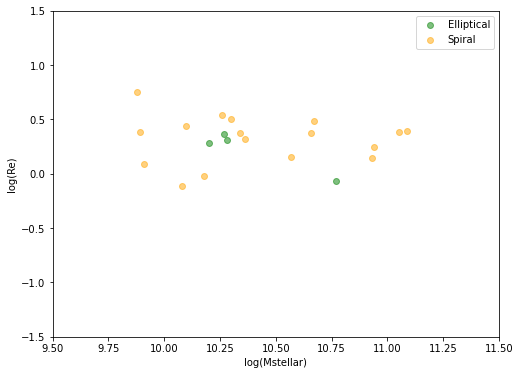

['nonmember_adjusted == 1', "cluster == 'SpARCS1034'"]
3 3 3 3


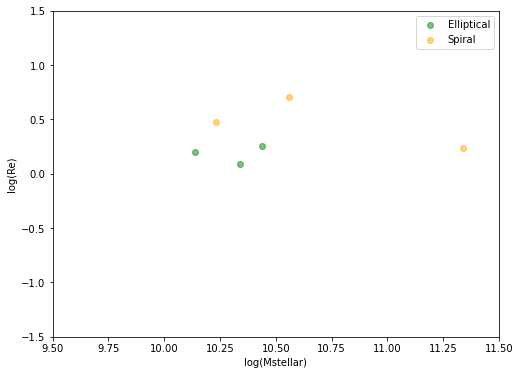

['nonmember_adjusted == 1']
39 110 39 110


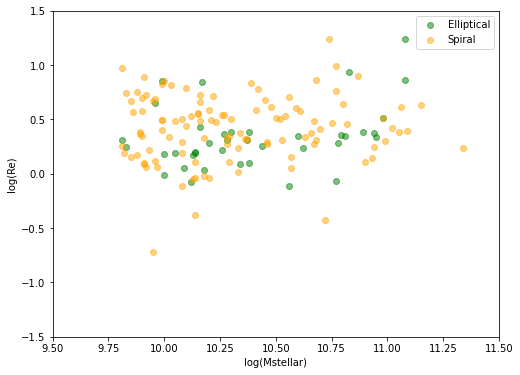

test passed.


In [59]:
gg.testPlots()